## Credit Card Fraud Detection


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from sklearn import model_selection

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import PowerTransformer ## Power Transformer
from sklearn.model_selection import validation_curve ## ROC - AUC curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score ## Accuracy, confusion matrix
from sklearn.model_selection import KFold,  GridSearchCV
## XG Boost packages
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn import svm

## Exploratory data analysis

In [428]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [429]:
df2 = df

In [261]:
#observe the different feature type present in the data

df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [263]:
df.shape

(284807, 31)

Here we will observe the distribution of our classes

In [264]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print('Normal(non-fraud) transactions ',normal_share,'%')
print('Fraud transactions ',fraud_share,'%')

Normal(non-fraud) transactions  99.82725143693798 %
Fraud transactions  0.1727485630620034 %


### The data is highly imbalanced having 99.83% non fraudelent transactions and 0.173% fraud transactions

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud , 1: Fraud)')

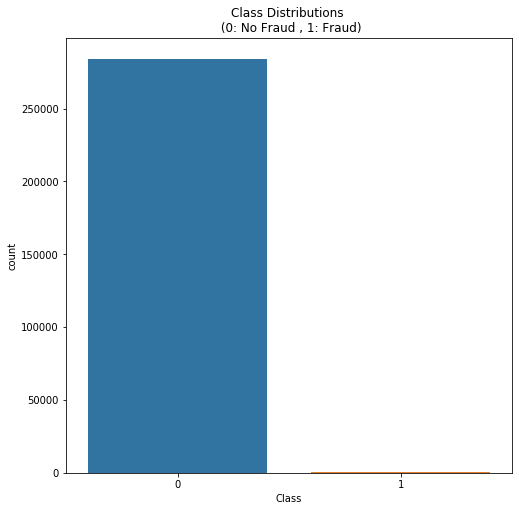

In [265]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize = (8,8))
sns.countplot('Class', data=df)
plt.title('Class Distributions \n (0: No Fraud , 1: Fraud)')


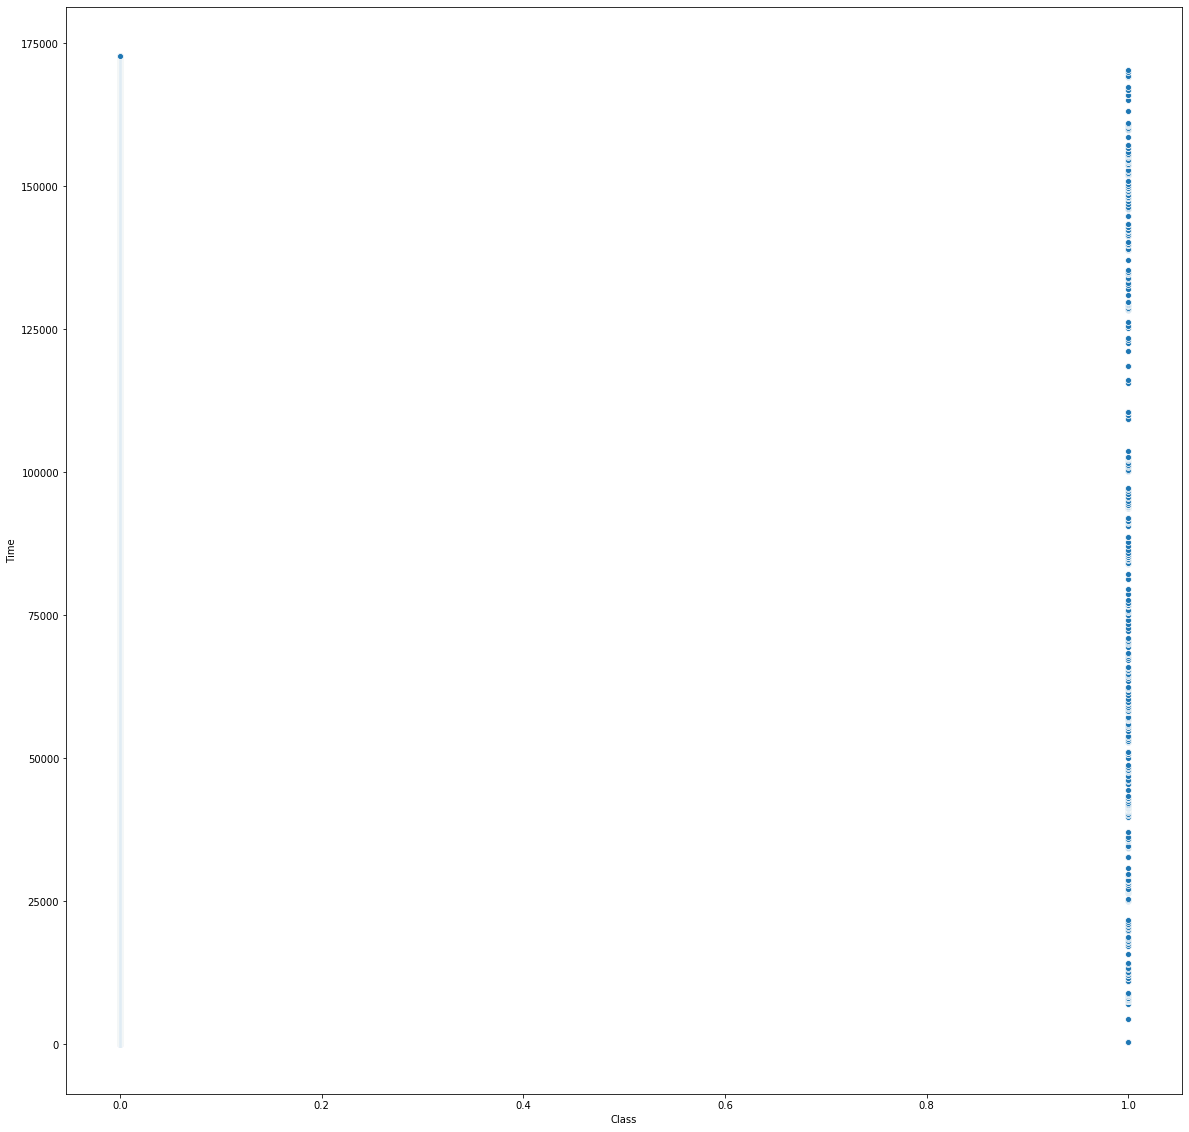

In [266]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(y = df['Time'],x = df['Class'])
plt.show()

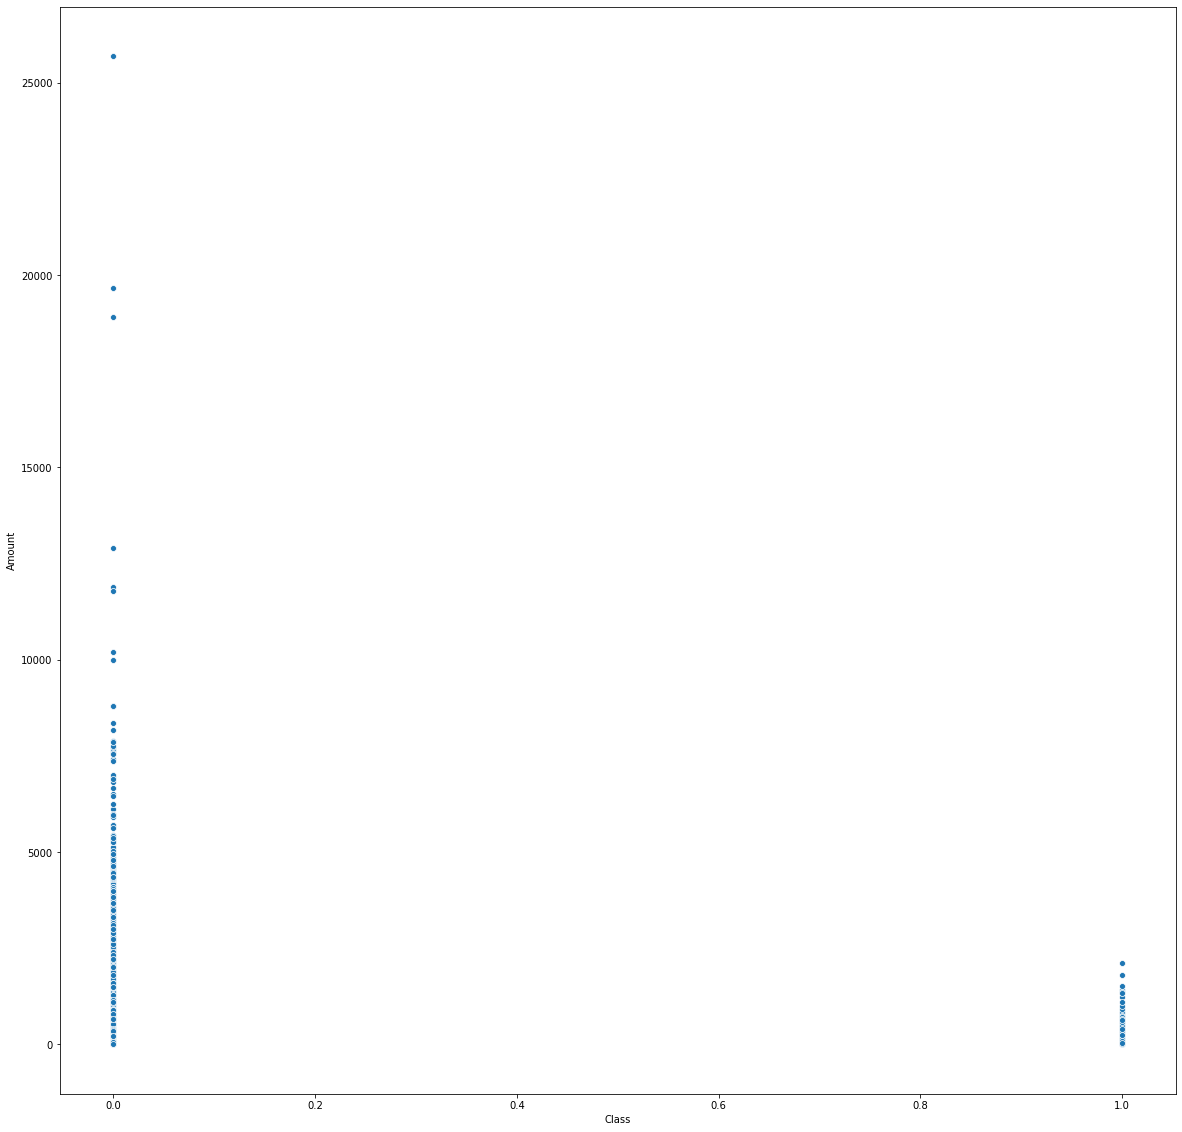

In [267]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(x = df['Class'], y = df['Amount'])
plt.show()

### Scaling the amount variable
#### Robust Scaler will be used as it is less prone to outliers 

In [268]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df.drop(['Amount'],axis = 1, inplace = True)

#### As can be seen the fraudelent transactions are usually of amount `<$5000`  its like this so that it doesn't gets noticed easily

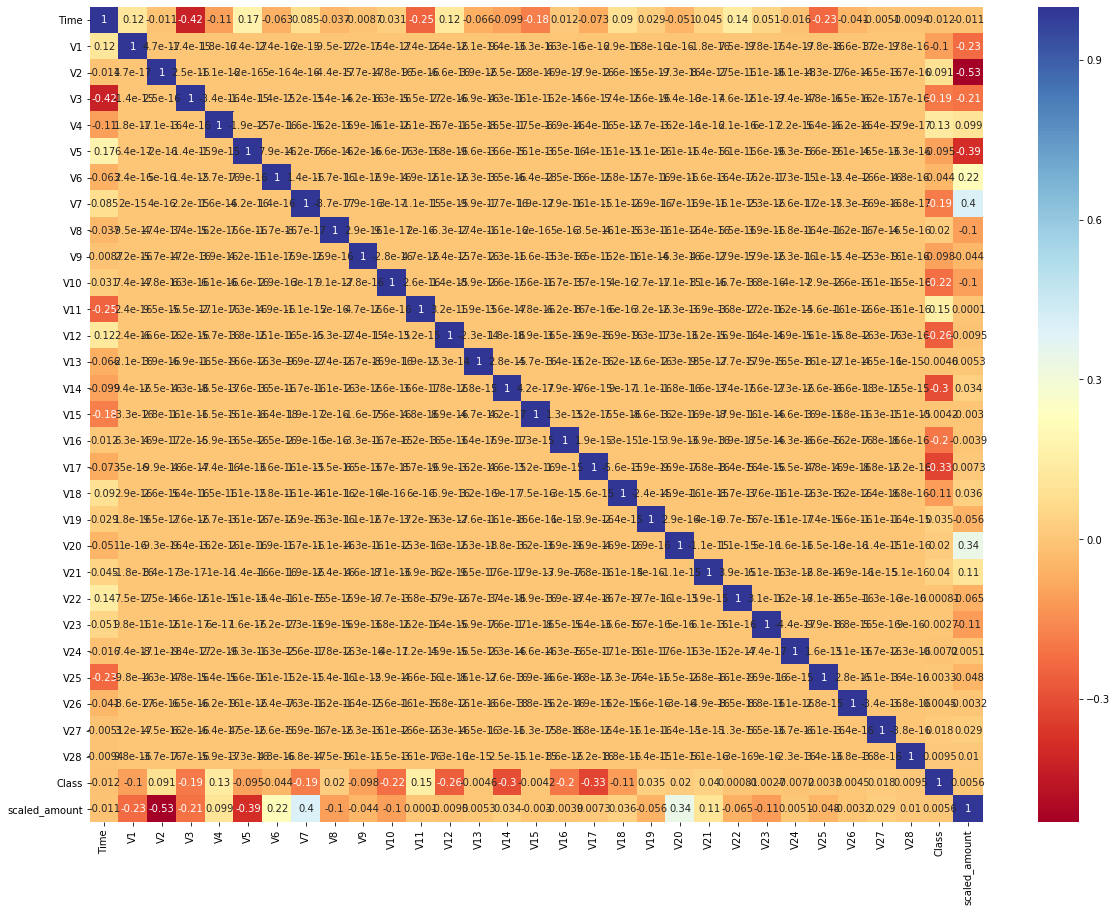

In [269]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap='RdYlBu')
plt.show()

In [270]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.012323,-0.010596
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.101347,-0.227709
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,...,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,0.091289,-0.531409
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,...,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.192961,-0.210880
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,...,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.133447,0.098732
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,...,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.094974,-0.386356
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,...,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,-0.043643,0.215981
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,...,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,-0.187257,0.397311
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,...,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,0.019875,-0.103079
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,...,4.578389e-17,2.871855e-17,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.097733,-0.044246


In [271]:
# Drop unnecessary columns

df = df.drop(['Time'],axis = 1)

<Figure size 1440x1440 with 0 Axes>

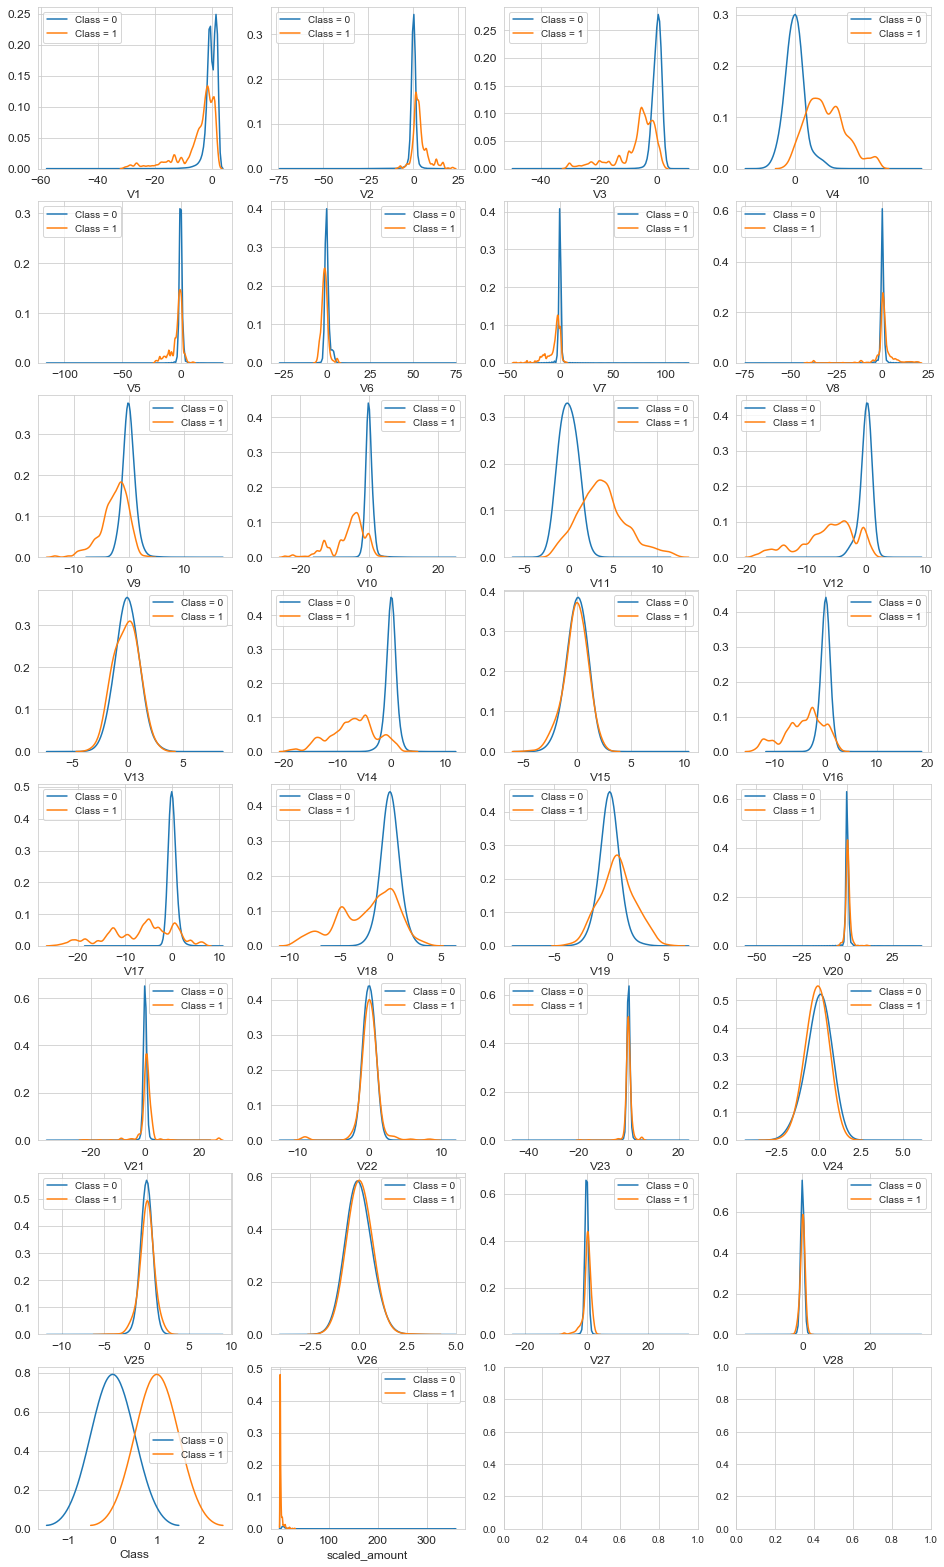

In [272]:
var = df.columns.values

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

### Splitting the data into train & test data

In [15]:
df3 = df
df3.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0,-0.256131
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,0,-0.237686
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0,0.262698
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0,0.994900
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,0,-0.255991


In [16]:
y= df['Class']


#class variable

In [17]:
del df['Class']

In [18]:
x = df

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 100)

In [431]:
y2 = df2['Class']
del df2['Class']
del df2['Time']
x2 = df2
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2,y2,test_size = 0.25, random_state = 100)

In [432]:
X_test2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
49089,1.229452,-0.235478,-0.627166,0.419877,1.797014,4.069574,-0.896223,1.036103,0.745991,-0.147304,...,-0.057922,-0.170060,-0.288750,-0.130270,1.025935,0.847990,-0.271476,0.060052,0.018104,1.99
154704,2.016893,-0.088751,-2.989257,-0.142575,2.675427,3.332289,-0.652336,0.752811,1.962566,-1.025024,...,-0.147619,-0.184153,-0.089661,0.087188,0.570679,0.101899,0.620842,-0.048958,-0.042831,6.99
67247,0.535093,-1.469185,0.868279,0.385462,-1.439135,0.368118,-0.499370,0.303698,1.042073,-0.437209,...,0.437685,0.028010,-0.384708,-0.128376,0.286638,-0.136700,0.913904,-0.083364,0.052485,306.16
251657,2.128486,-0.117215,-1.513910,0.166456,0.359070,-0.540072,0.116023,-0.216140,0.680314,0.079977,...,-0.227278,-0.357993,-0.905085,0.223474,-1.075605,-0.188519,0.267672,-0.071733,-0.072238,0.99
201903,0.558593,1.587908,-2.368767,5.124413,2.171788,-0.500419,1.059829,-0.254233,-1.959060,0.948915,...,0.249457,-0.035049,0.271455,0.381606,0.332001,-0.334757,0.448890,0.168585,0.004955,30.27


##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [20]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
370
122


### Plotting the distribution of a variable

Text(0.5, 1.0, 'Distribution of V6 variable')

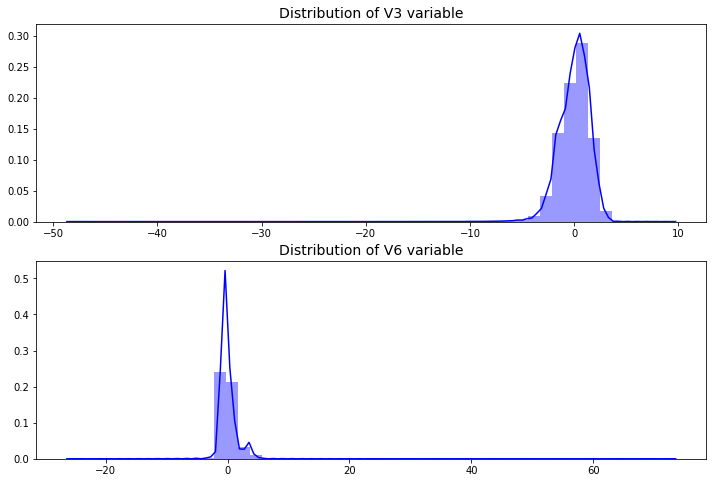

In [21]:
# plot the histogram of a variable from the dataset to see the skewness
plt.figure(figsize=(12,8))

plt.subplot(2,1,1)
sns.distplot(df['V3'].values,  color='b')
plt.title('Distribution of V3 variable', fontsize=14)


plt.subplot(2,1,2)
sns.distplot(df['V6'].values,  color='b')
plt.title('Distribution of V6 variable', fontsize=14)

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [22]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

pt = PowerTransformer()
X_train = pt.fit_transform(X_train)


In [23]:
X_test = pt.transform(X_test)

Text(0.5, 1.0, 'Distribution of V3 variable')

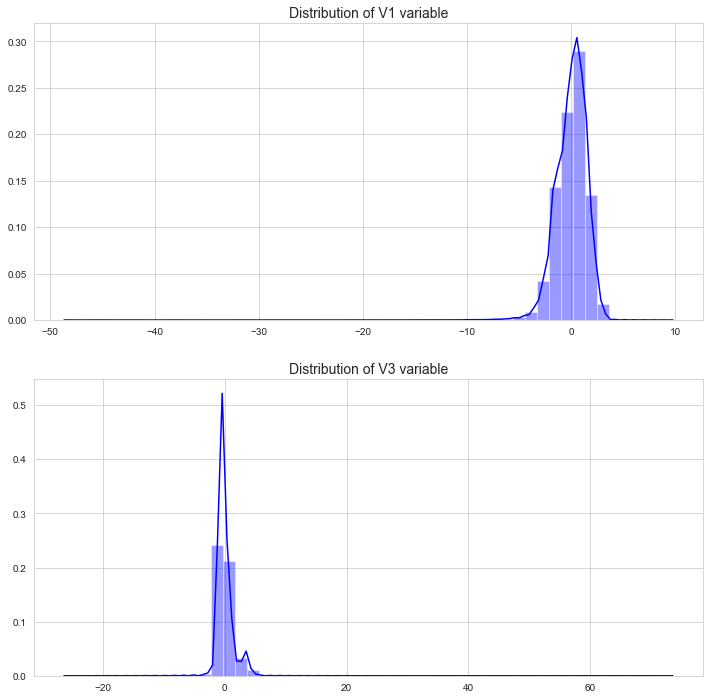

In [25]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

RangeIndex(start=0, stop=29, step=1)

Text(0.5, 1.0, 'Distribution of V3 variable')

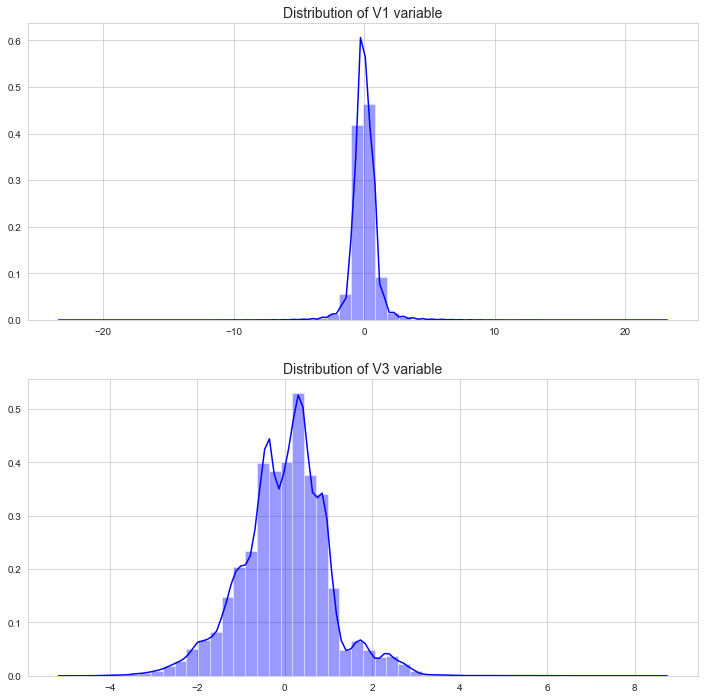

In [484]:
# plot the histogram of a variable from the dataset again to see the result 

plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.distplot(X_train.iloc[:,1].values,  color='b')
plt.title('Distribution of V1 variable', fontsize=14)


plt.subplot(2,1,2)
sns.distplot(X_train.iloc[:,3].values,  color='b')
plt.title('Distribution of V3 variable', fontsize=14)


## Model Building
- Build different models on the imbalanced dataset and see the result

In [26]:
# Logistic Regression
from sklearn import linear_model #import the package

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()



num_C = X_train.select_dtypes(include = ['float64','int64'] )  #--> list of values
cv_num = 5  #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [27]:

## Hyperparameter tuning for logistic regression

C_param_range = [0.001,0.01,0.1,1,10,100]

X_train_table = pd.DataFrame(columns = ['C_parameter','ROC_AUC score'])
X_train_table['C_parameter'] = C_param_range

j = 0
for i in C_param_range:
    lr = LogisticRegression(penalty = 'l2', C = i,random_state = 0)
    lr.fit(X_train,y_train)
    
    y_pred_fraud = lr.predict(X_test)
    
    X_train_table.iloc[j,1] = roc_auc_score(y_test,y_pred_fraud)
    j += 1
    
    

In [28]:
X_train_table

,C_parameter,ROC_AUC score
0,0.001,0.749866
1,0.010,0.786752
2,0.100,0.803138
3,1.000,0.815433
4,10.000,0.815433
5,100.000,0.815433


#### Thus as can be seen the optimum value for C = 1/lambda is 1

### KNN


In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [30]:
pred=knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[71059    21]
 [   31    91]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71080
           1       0.81      0.75      0.78       122

    accuracy                           1.00     71202
   macro avg       0.91      0.87      0.89     71202
weighted avg       1.00      1.00      1.00     71202



In [31]:
print(roc_auc_score(y_test,pred))

0.8728030987942471


### SVM

In [32]:
from sklearn import svm

classifier = svm.SVC(kernel='linear') # We set a SVM classifier, the default SVM Classifier (Kernel = Radial Basis Function)

In [33]:
classifier.fit(X_train, y_train) # Then we train our model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [34]:
prediction_SVM = classifier.predict(X_test)

In [35]:
print(roc_auc_score(y_test,prediction_SVM))

0.8604447078793693


In [36]:
print(confusion_matrix(y_test,prediction_SVM))

[[71050    30]
 [   34    88]]


In [39]:
print(classification_report(y_test,prediction_SVM))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71080
           1       0.75      0.72      0.73       122

    accuracy                           1.00     71202
   macro avg       0.87      0.86      0.87     71202
weighted avg       1.00      1.00      1.00     71202



### Decision Tree

In [41]:
## Decision Tree
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
dt_default = DecisionTreeClassifier()
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [42]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71080
           1       0.64      0.77      0.70       122

    accuracy                           1.00     71202
   macro avg       0.82      0.88      0.85     71202
weighted avg       1.00      1.00      1.00     71202



In [43]:
# GridSearchCV to find optimal min_samples_split



# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(2, 20,5),'max_depth':range(2,10,3),'min_samples_leaf':(5,30,10)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(2, 10, 3),
                         'min_samples_leaf': (5, 30, 10),
                        

In [44]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.256938,0.017232,0.028055,1.232782e-03,2,5,2,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.905302,0.864731,0.878271,0.844536,0.912038,0.880976,0.025122,29
1,3.260496,0.019600,0.027926,1.092058e-03,2,5,7,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.905302,0.864731,0.878271,0.844536,0.912038,0.880976,0.025122,29
2,3.262482,0.015569,0.028340,4.762753e-04,2,5,12,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.905302,0.864731,0.878271,0.844536,0.912038,0.880976,0.025122,29
3,3.256697,0.002998,0.028558,4.822113e-04,2,5,17,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.905302,0.864731,0.878271,0.844536,0.912038,0.880976,0.025122,29
4,3.261286,0.034010,0.028323,4.856364e-04,2,30,2,"{'max_depth': 2, 'min_samples_leaf': 30, 'min_...",0.905299,0.864666,0.891703,0.844536,0.912026,0.883646,0.025413,25
5,3.263877,0.016965,0.028524,4.884416e-04,2,30,7,"{'max_depth': 2, 'min_samples_leaf': 30, 'min_...",0.905299,0.864666,0.891703,0.844536,0.912026,0.883646,0.025413,25
6,3.256074,0.012494,0.028918,6.214635e-06,2,30,12,"{'max_depth': 2, 'min_samples_leaf': 30, 'min_...",0.905299,0.864666,0.891703,0.844536,0.912026,0.883646,0.025413,25
7,3.293997,0.020598,0.028924,4.523674e-07,2,30,17,"{'max_depth': 2, 'min_samples_leaf': 30, 'min_...",0.905299,0.864666,0.891703,0.844536,0.912026,0.883646,0.025413,25
8,3.284621,0.026598,0.028721,3.972994e-04,2,10,2,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_...",0.905302,0.864731,0.878271,0.844536,0.912038,0.880976,0.025122,29
9,3.275447,0.024755,0.028733,3.780146e-04,2,10,7,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_...",0.905302,0.864731,0.878271,0.844536,0.912038,0.880976,0.025122,29


In [45]:
dt_default = DecisionTreeClassifier(max_depth=8,min_samples_leaf=30,min_samples_split=2)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [46]:
# Making predictions
# predict
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71080
           1       0.72      0.72      0.72       122

    accuracy                           1.00     71202
   macro avg       0.86      0.86      0.86     71202
weighted avg       1.00      1.00      1.00     71202



In [48]:
roc = metrics.roc_auc_score(y_test,y_pred_default)
print('ROC score for decision trees:',roc)

ROC score for decision trees: 0.8604095362417777


##### Thus as can be seen the ROC score is only 0.86

### Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [50]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
# Making predictions
predictions = rfc.predict(X_test)
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71080
           1       0.87      0.74      0.80       122

    accuracy                           1.00     71202
   macro avg       0.94      0.87      0.90     71202
weighted avg       1.00      1.00      1.00     71202



In [52]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5),'max_features': [4, 8, 12],'min_samples_leaf': range(10, 70, 20)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [53]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.234476,0.077224,0.063862,0.000617,2,4,10,"{'max_depth': 2, 'max_features': 4, 'min_sampl...",0.952752,0.941007,0.895021,0.911645,0.888296,0.917744,0.025248,36
1,3.120511,0.358251,0.061182,0.006656,2,4,30,"{'max_depth': 2, 'max_features': 4, 'min_sampl...",0.954635,0.921383,0.912215,0.897772,0.916091,0.920419,0.018818,34
2,3.069798,0.133299,0.060873,0.006507,2,4,50,"{'max_depth': 2, 'max_features': 4, 'min_sampl...",0.940118,0.925146,0.928367,0.910791,0.925277,0.925940,0.009354,28
3,5.831616,0.200926,0.055455,0.015767,2,8,10,"{'max_depth': 2, 'max_features': 8, 'min_sampl...",0.938791,0.924992,0.925377,0.898454,0.932072,0.923937,0.013707,30
4,5.975849,0.046233,0.063432,0.000472,2,8,30,"{'max_depth': 2, 'max_features': 8, 'min_sampl...",0.938842,0.925210,0.925185,0.910902,0.915886,0.923205,0.009564,32
5,5.987393,0.044628,0.064827,0.002093,2,8,50,"{'max_depth': 2, 'max_features': 8, 'min_sampl...",0.937949,0.925190,0.911649,0.900680,0.929306,0.920955,0.013222,33
6,8.713895,0.048458,0.063235,0.000796,2,12,10,"{'max_depth': 2, 'max_features': 12, 'min_samp...",0.931431,0.925338,0.925437,0.911893,0.925473,0.923914,0.006447,31
7,8.713911,0.051860,0.063630,0.000400,2,12,30,"{'max_depth': 2, 'max_features': 12, 'min_samp...",0.932176,0.924515,0.925323,0.911739,0.932106,0.925172,0.007457,29
8,8.615372,0.165393,0.065254,0.002779,2,12,50,"{'max_depth': 2, 'max_features': 12, 'min_samp...",0.932106,0.904915,0.925212,0.911897,0.925461,0.919918,0.009967,35
9,10.060721,0.059985,0.078891,0.000900,7,4,10,"{'max_depth': 7, 'max_features': 4, 'min_sampl...",0.970491,0.955679,0.956886,0.967992,0.967266,0.963663,0.006132,15


In [54]:
# printing the optimal accuracy score and hyperparameters
print('We can get ROC_AUC of',rf.best_score_,'using',rf.best_params_)

We can get ROC_AUC of 0.9749208619598095 using {'max_depth': 12, 'max_features': 8, 'min_samples_leaf': 10}


In [55]:
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=12,
                             min_samples_leaf=10, 
                             max_features=8)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=12, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
# predict
#X_test_df = X_test_df.drop(['mobile_number'],axis = 1)
predictions1 = rfc.predict(X_test)
print(classification_report(y_test,predictions1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71080
           1       0.80      0.70      0.75       122

    accuracy                           1.00     71202
   macro avg       0.90      0.85      0.87     71202
weighted avg       1.00      1.00      1.00     71202



In [57]:
print(confusion_matrix(y_test,predictions1))

[[71059    21]
 [   37    85]]


In [58]:
# Accuracy of the model 
print(100*(accuracy_score(y_test,predictions1)))

99.91854161399961


In [59]:
roc = metrics.roc_auc_score(y_test,predictions1)
print('Roc score for Random Forest',roc)

Roc score for Random Forest 0.8482129348598209


#### XGBOOST

In [60]:
import gc # for deleting unused variables

model = XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [61]:
y_pred = model.predict_proba(X_test)
y_pred[:10]

array([[9.9984950e-01, 1.5052292e-04],
       [9.9976885e-01, 2.3114406e-04],
       [9.9991143e-01, 8.8560373e-05],
       [9.9986035e-01, 1.3966244e-04],
       [9.9148327e-01, 8.5167093e-03],
       [9.9983549e-01, 1.6450702e-04],
       [9.9993229e-01, 6.7697780e-05],
       [9.9984998e-01, 1.5002783e-04],
       [9.9931127e-01, 6.8873470e-04],
       [9.9969667e-01, 3.0332571e-04]], dtype=float32)

In [62]:
roc = metrics.roc_auc_score(y_test,y_pred[:,1])
print(roc*100)

97.55281511480945


In [63]:
folds = 4
param_grid = {'learning_rate':[0.2,0.4,0.6],
             'subsample':[0.3,0.6,0.9]
              }

xgb_model = XGBClassifier()

model_cv = GridSearchCV(estimator=xgb_model,
                       param_grid = param_grid,
                       scoring='roc_auc',
                       cv = folds,
                       verbose=1,
                       return_train_score=True)

In [64]:
model_cv.fit(X_train,y_train)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 49.2min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.4, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, re

In [65]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,58.682619,2.027579,0.318889,0.055602,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.978212,0.978363,0.962095,0.967253,0.971481,0.007047,5,0.999682,0.999360,0.999778,0.999569,0.999598,1.556180e-04
1,85.585459,1.965621,0.436552,0.011315,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.977591,0.979872,0.972335,0.975097,0.976224,0.002809,2,0.999970,0.999984,0.999947,0.999976,0.999969,1.376982e-05
2,94.675511,0.251554,0.435347,0.005675,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.977320,0.976585,0.967295,0.975359,0.974140,0.004014,3,0.999964,0.999992,0.999986,0.999972,0.999978,1.102144e-05
3,64.896618,0.373052,0.449813,0.007592,0.4,0.3,"{'learning_rate': 0.4, 'subsample': 0.3}",0.956788,0.978699,0.958808,0.970597,0.966223,0.008927,7,0.999900,0.999969,0.999946,0.999931,0.999937,2.475481e-05
4,86.093525,0.419994,0.451268,0.010265,0.4,0.6,"{'learning_rate': 0.4, 'subsample': 0.6}",0.978304,0.974312,0.962501,0.972563,0.971920,0.005823,4,1.000000,1.000000,1.000000,1.000000,1.000000,6.557568e-08
5,93.776078,0.347368,0.432842,0.010262,0.4,0.9,"{'learning_rate': 0.4, 'subsample': 0.9}",0.983044,0.977937,0.967571,0.984342,0.978224,0.006600,1,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
6,64.629019,0.416548,0.454504,0.005937,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.944499,0.969614,0.947001,0.978205,0.959830,0.014431,9,0.999932,0.999993,0.999994,0.999956,0.999969,2.637580e-05
7,83.004071,0.827816,0.458528,0.007126,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.958200,0.963038,0.965091,0.975883,0.965553,0.006467,8,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
8,90.238901,0.854406,0.456985,0.014770,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.978957,0.970793,0.957699,0.975020,0.970617,0.007997,6,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00


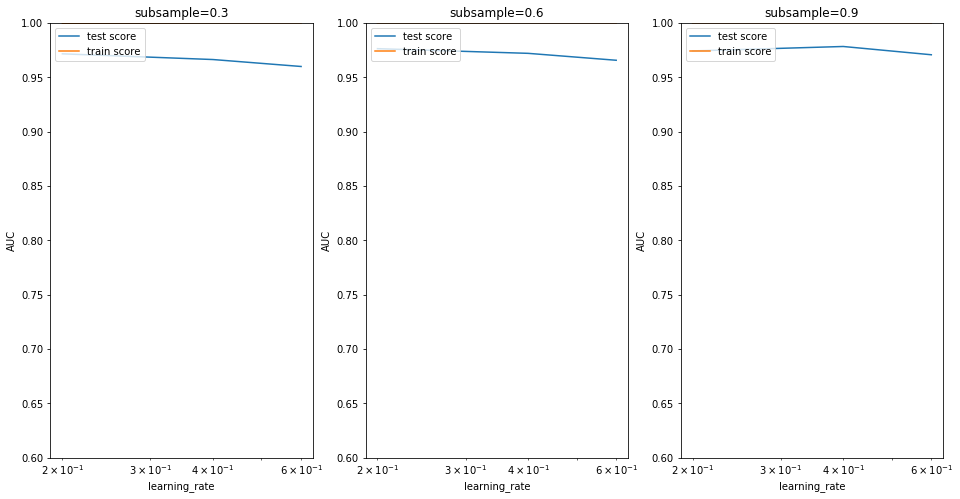

In [66]:
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
plt.figure(figsize=(16,8))
param_grid = {'learning_rate':[0.2,0.4,0.6],
             'subsample':[0.3,0.6,0.9]}

for n,subsample in enumerate(param_grid['subsample']):
    
    plt.subplot(1,len(param_grid['subsample']),n+1)
    df = cv_results[cv_results['param_subsample']==subsample]
    
    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60,1])
    plt.legend(['test score', 'train score'], loc = 'upper left')
    plt.xscale('log')

In [67]:
# printing the optimal accuracy score and hyperparameters
print('We can get roc_auc of',model_cv.best_score_,'using',model_cv.best_params_)

We can get roc_auc of 0.9782235812811858 using {'learning_rate': 0.4, 'subsample': 0.9}


In [68]:
xgb = XGBClassifier(learning_rate=0.4,subsample=0.9)

In [69]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.4, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)

In [70]:
y_pred_xgb = xgb.predict_proba(X_test)
y_pred_xgb[:10]

array([[9.9993682e-01, 6.3181884e-05],
       [9.9999821e-01, 1.7958401e-06],
       [9.9999195e-01, 8.0612981e-06],
       [9.9999464e-01, 5.3488880e-06],
       [9.9934053e-01, 6.5944146e-04],
       [9.9997538e-01, 2.4618492e-05],
       [9.9998689e-01, 1.3135298e-05],
       [9.9999338e-01, 6.6027133e-06],
       [9.9999833e-01, 1.6889726e-06],
       [9.9998736e-01, 1.2627485e-05]], dtype=float32)

In [71]:
auc = metrics.roc_auc_score(y_test,y_pred[:,1])
auc

0.9755281511480944

In [72]:
y_pred_df = pd.DataFrame(y_pred[:,1])
y_pred_df.shape

(71202, 1)

In [73]:
confusion = metrics.confusion_matrix(y_test,y_pred_df.round())
confusion

array([[71063,    17],
       [   29,    93]], dtype=int64)

In [74]:
# Accuracy of the model 
print(classification_report(y_test,y_pred_df.round()))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71080
           1       0.85      0.76      0.80       122

    accuracy                           1.00     71202
   macro avg       0.92      0.88      0.90     71202
weighted avg       1.00      1.00      1.00     71202



In [180]:
# perform the best oversampling method on X_train & y_train

xgb_final = XGBClassifier(learning_rate=0.4,subsample=0.9)  #initialise the model with optimum hyperparameters
xgb_final.fit(X_train,y_train) # fit on the balanced dataset
y_pred_xgb_best = xgb_final.predict_proba(X_test)


In [182]:
y_pred_xgb_best_final = pd.DataFrame(y_pred_xgb_best[:,1])
y_pred_xgb_best_final.shape

(71202, 1)

In [183]:
print(metrics.roc_auc_score(y_test,y_pred_xgb_best_final.round()))

0.8728734420694301


Top var = 17
2nd Top var = 14
3rd Top var = 10


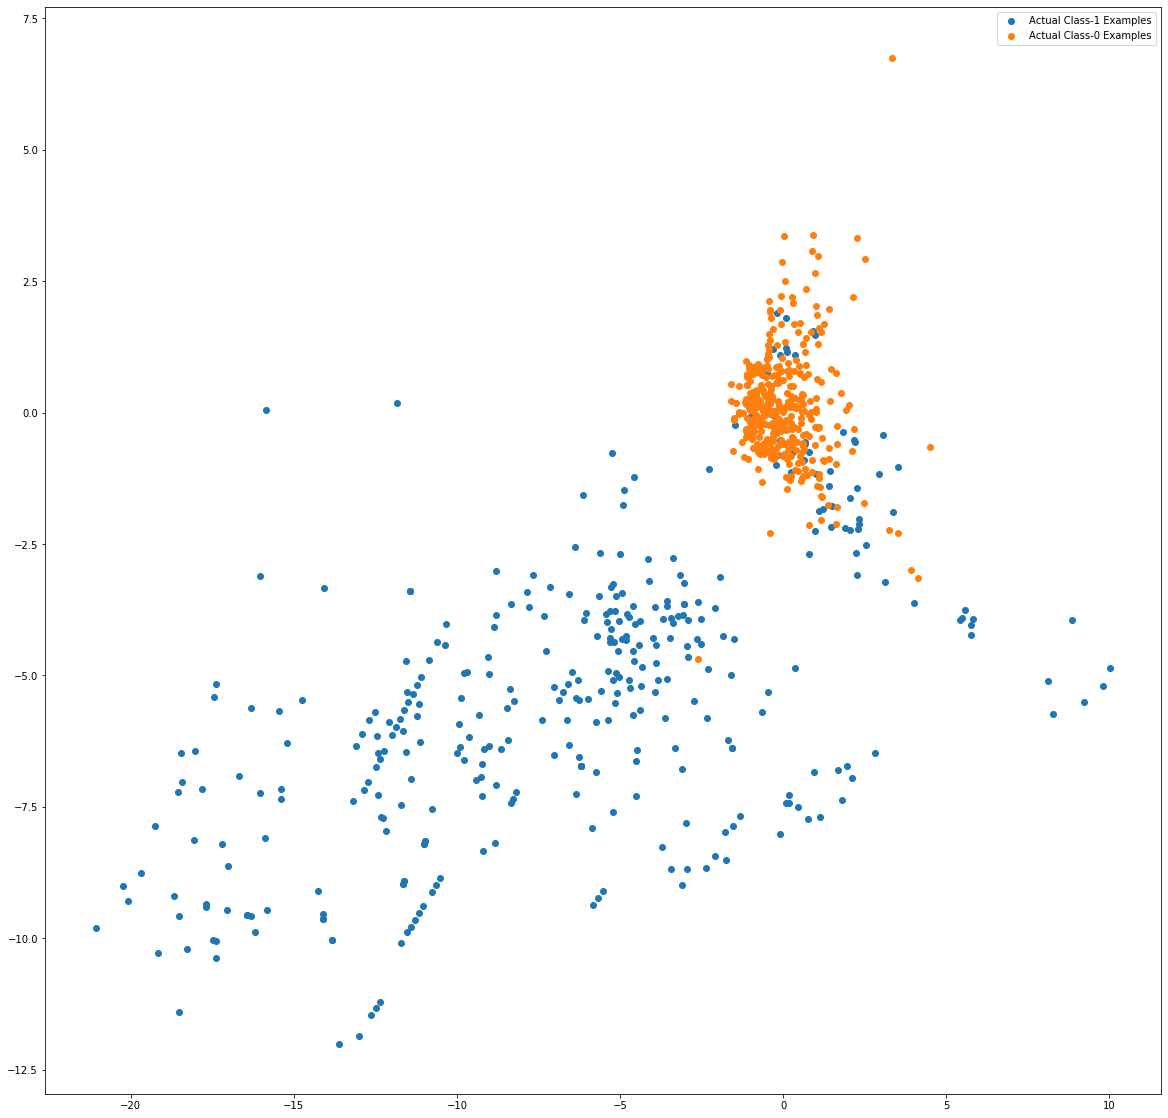

In [185]:
var_imp = []
for i in xgb_final.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_final.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_final.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_final.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_final.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_final.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Performed class balancing with :
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

In [77]:
# Logistic Regression
from sklearn import linear_model #import the package

num_C =  X_train.select_dtypes(include = ['float64','int64'] )   #--> list of values
cv_num = [0.001,0.01,0.1,1,10,100]  #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### SMOTE

In [78]:
from imblearn import over_sampling #- import the packages
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state = 0)

#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


In [79]:
## Building the X_train_cv, y_train_cv using SMOTE random oversampling
X_train_cv, y_train_cv = smt.fit_resample(X_train,y_train)
np.bincount(y_train_cv)

#X_train_cv = pd.DataFrame(X_train_cv, columns= X_train_columns)

array([213235, 213235], dtype=int64)

In [80]:
X_train_columns = X_train.columns
X_train_cv = pd.DataFrame(X_train_cv, columns=X_train_columns)

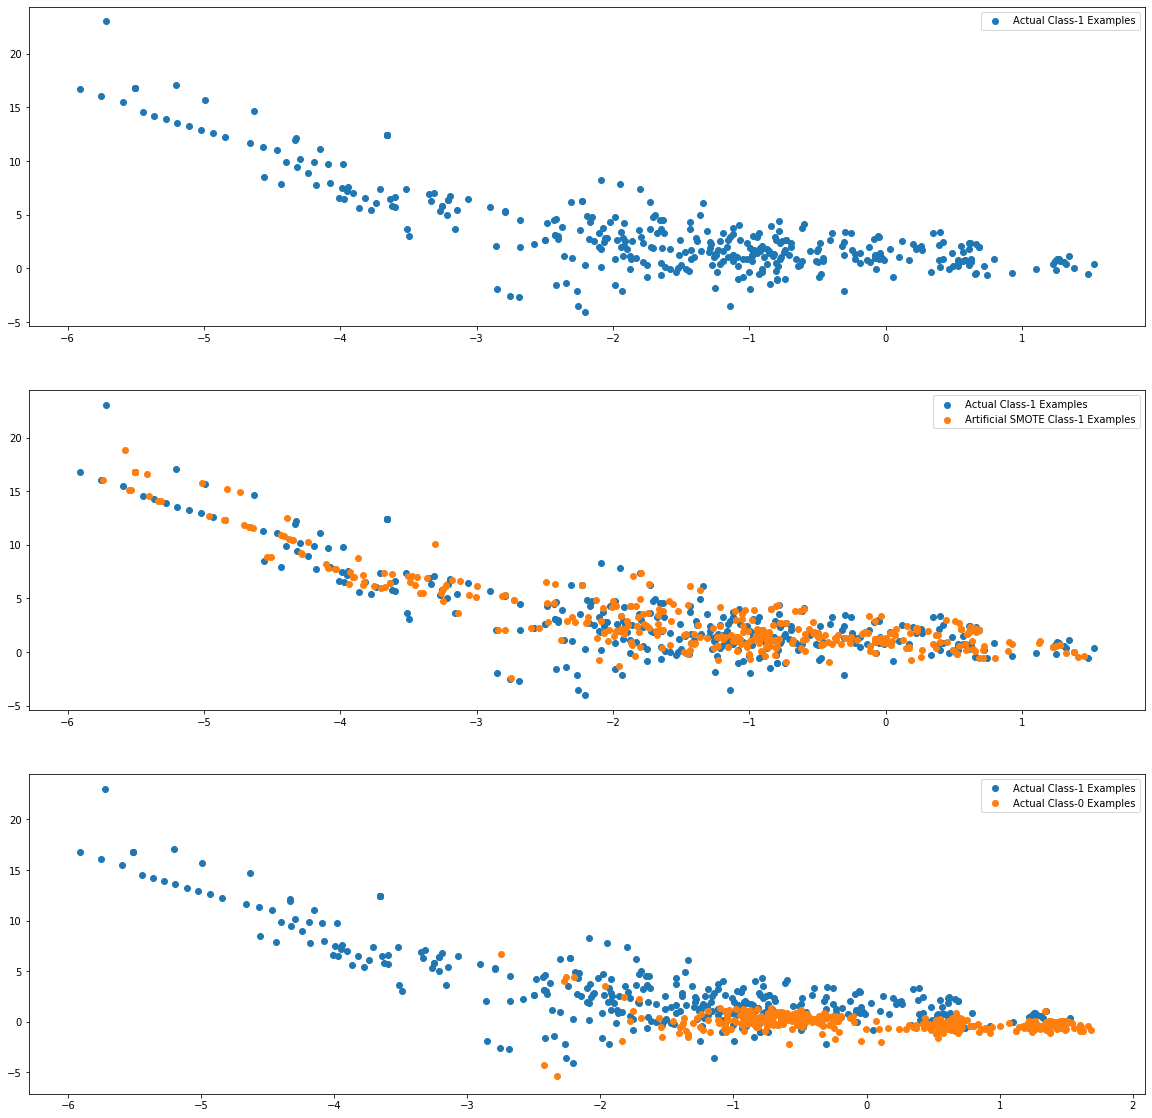

In [81]:
import warnings
warnings.filterwarnings("ignore")


#sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = smt.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

#### After performing SMOTE the classes are balanced with equal number of samples for both the classes.

In [82]:
X_train_cv.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-0.909443,1.018396,1.342998,0.032714,-0.274220,-0.772294,0.559472,-0.092753,-0.404456,-0.084273,...,0.078031,-0.251887,-0.795493,-0.138079,1.258321,0.204214,0.219317,-1.092588,-0.481267,-0.541675
1,-1.691436,0.405942,-0.712540,-0.036731,-2.529866,0.054850,-0.328242,2.192528,0.428920,-1.403381,...,-1.095115,-0.092402,-0.257817,0.537037,0.818771,-1.414121,1.287567,-0.446808,-1.460378,1.601283
2,-1.839919,-1.879686,-0.089647,-1.375905,0.257270,1.450839,0.838481,0.248154,-0.594623,-0.139668,...,-2.470298,-1.173167,-0.186515,3.260273,-1.466223,1.733374,-0.714125,0.841220,-1.885470,1.789740
3,0.628096,0.026415,0.311417,0.524219,-0.371123,-0.517105,-0.052650,-0.130199,0.154954,-0.044729,...,-0.226335,-0.286502,-0.857807,0.336913,0.586606,0.118816,0.313397,-0.064144,0.067474,-1.147284
4,0.617433,-0.066274,0.563408,0.483309,-0.464895,-0.099950,-0.344283,-0.014638,0.369421,-0.082900,...,-0.139793,-0.060883,-0.178979,0.184847,0.069266,0.144187,0.579851,0.005778,0.085724,-0.912452


In [84]:

n_folds = 5

params =  {'C':[0.001,0.01,0.1,1,10,100],'penalty':['l1','l2']}

log = LogisticRegression(random_state = 0)

log_reg = GridSearchCV(log, params, 
                    cv=n_folds, 
                   scoring="roc_auc")
log_reg.fit(X_train_smote,y_train_smote)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [85]:
# scores of GridSearch CV
scores_log = log_reg.cv_results_
pd.DataFrame(scores_log)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.409800,0.042588,0.053789,0.011643,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",0.990413,0.990464,0.990167,0.990170,0.990338,0.990311,0.000123,12
1,3.833778,0.041625,0.058838,0.002579,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.990829,0.990918,0.990562,0.990605,0.990803,0.990743,0.000137,11
2,4.572997,0.106516,0.056626,0.003485,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",0.990879,0.991005,0.990604,0.990665,0.990876,0.990805,0.000149,2
3,4.994472,0.018655,0.060814,0.006568,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.990891,0.991015,0.990615,0.990676,0.990886,0.990817,0.000149,1
4,5.324801,0.069077,0.056015,0.001312,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.990874,0.990999,0.990594,0.990665,0.990870,0.990800,0.000149,3
5,5.136100,0.063939,0.057995,0.001628,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.990873,0.990992,0.990589,0.990662,0.990868,0.990797,0.000149,4
6,5.473767,0.104747,0.059241,0.010066,1,l1,"{'C': 1, 'penalty': 'l1'}",0.990868,0.990992,0.990588,0.990660,0.990863,0.990794,0.000148,5
7,5.003453,0.099817,0.053230,0.001832,1,l2,"{'C': 1, 'penalty': 'l2'}",0.990867,0.990986,0.990584,0.990658,0.990862,0.990791,0.000148,8
8,5.408441,0.173469,0.053557,0.007632,10,l1,"{'C': 10, 'penalty': 'l1'}",0.990867,0.990991,0.990588,0.990660,0.990863,0.990794,0.000148,6
9,5.077237,0.055369,0.053846,0.003884,10,l2,"{'C': 10, 'penalty': 'l2'}",0.990867,0.990986,0.990583,0.990657,0.990861,0.990791,0.000148,9


In [86]:
# printing the optimal accuracy score and hyperparameters
print('We can get roc_auc of',log_reg.best_score_,'using',log_reg.best_params_)

We can get roc_auc of 0.9908166324819525 using {'C': 0.01, 'penalty': 'l2'}


In [87]:
log_reg_smote = LogisticRegression(penalty='l2',C = 0.01)

In [88]:
log_reg_smote.fit(X_train_smote,y_train_smote)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
y_pred_logreg_smote = log_reg_smote.predict(X_test)

In [135]:
print(classification_report(y_test,y_pred_logreg_smote))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     71080
           1       0.06      0.89      0.11       122

    accuracy                           0.97     71202
   macro avg       0.53      0.93      0.55     71202
weighted avg       1.00      0.97      0.99     71202



In [136]:
print(roc_auc_score(y_test,y_pred_logreg_smote))

0.9341298652176719


#### KNN using SMOTE

In [130]:
knn_smote = KNeighborsClassifier(n_neighbors=5)
knn_smote.fit(X_train_smote,y_train_smote)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [131]:
y_pred_knn_smote = knn_smote.predict(X_test)

In [132]:
print(classification_report(y_test,y_pred_knn_smote))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71080
           1       0.45      0.82      0.58       122

    accuracy                           1.00     71202
   macro avg       0.72      0.91      0.79     71202
weighted avg       1.00      1.00      1.00     71202



In [133]:
print(roc_auc_score(y_test,y_pred_knn_smote))

0.908970843289021


## Decision Trees with SMOTE

In [91]:
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(2, 20,5),'max_depth':range(2,10,3),'min_samples_leaf':(5,40,10)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc")
tree.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(2, 10, 3),
                         'min_samples_leaf': (5, 40, 10),
                        

In [92]:
# scores of GridSearch CV
scores_dt = tree.cv_results_
pd.DataFrame(scores_dt)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.742583,0.078982,0.056976,0.000251,2,5,2,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.955140,0.953938,0.953659,0.952992,0.954561,0.954058,0.000739,25
1,6.759922,0.084616,0.057237,0.000477,2,5,7,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.955140,0.953938,0.953659,0.952992,0.954561,0.954058,0.000739,25
2,6.647637,0.366670,0.057454,0.001198,2,5,12,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.955140,0.953938,0.953659,0.952992,0.954561,0.954058,0.000739,25
3,6.778080,0.029532,0.057046,0.000400,2,5,17,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.955140,0.953938,0.953659,0.952992,0.954561,0.954058,0.000739,25
4,6.779280,0.099879,0.057239,0.000489,2,40,2,"{'max_depth': 2, 'min_samples_leaf': 40, 'min_...",0.955140,0.953938,0.953659,0.952992,0.954561,0.954058,0.000739,25
5,6.795435,0.022012,0.056848,0.000001,2,40,7,"{'max_depth': 2, 'min_samples_leaf': 40, 'min_...",0.955140,0.953938,0.953659,0.952992,0.954561,0.954058,0.000739,25
6,6.736381,0.127955,0.057647,0.000399,2,40,12,"{'max_depth': 2, 'min_samples_leaf': 40, 'min_...",0.955140,0.953938,0.953659,0.952992,0.954561,0.954058,0.000739,25
7,6.642255,0.091312,0.057451,0.000812,2,40,17,"{'max_depth': 2, 'min_samples_leaf': 40, 'min_...",0.955140,0.953938,0.953659,0.952992,0.954561,0.954058,0.000739,25
8,6.752946,0.015825,0.055642,0.002894,2,10,2,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_...",0.955140,0.953938,0.953659,0.952992,0.954561,0.954058,0.000739,25
9,6.780674,0.027492,0.058239,0.002794,2,10,7,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_...",0.955140,0.953938,0.953659,0.952992,0.954561,0.954058,0.000739,25


In [93]:
# printing the optimal accuracy score and hyperparameters
print('We can get roc_auc of',tree.best_score_,'using',tree.best_params_)

We can get roc_auc of 0.9951113265682348 using {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 2}


##### We will fit the DT using above parameters

In [94]:
dtree_smote = DecisionTreeClassifier(max_depth=8,min_samples_leaf=40,min_samples_split=2)
dtree_smote.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=40, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [95]:
y_pred_smote_dt = dtree_smote.predict(X_test)

In [96]:
# Printing classification report
print(classification_report(y_test, y_pred_smote_dt))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71080
           1       0.07      0.88      0.14       122

    accuracy                           0.98     71202
   macro avg       0.54      0.93      0.56     71202
weighted avg       1.00      0.98      0.99     71202



In [97]:
print(metrics.roc_auc_score(y_test,y_pred_smote_dt))

0.9291548659095732


#### As compared to the DT fitted without class balancing we see that there's a very good improvement in terms of ROC auc score 

### Random Forest using SMOTE

In [98]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5),'max_features': [4, 8, 12],'min_samples_leaf': range(10, 70, 20)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf_smote = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc")
rf_smote.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [99]:
# scores of GridSearch CV
scores_rf = rf_smote.cv_results_
pd.DataFrame(scores_rf)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,7.008670,0.054904,0.157205,0.004195,2,4,10,"{'max_depth': 2, 'max_features': 4, 'min_sampl...",0.965065,0.971126,0.967484,0.964397,0.961082,0.965831,0.003346,34
1,7.032608,0.065008,0.150197,0.003847,2,4,30,"{'max_depth': 2, 'max_features': 4, 'min_sampl...",0.967349,0.966838,0.964327,0.965545,0.963149,0.965442,0.001556,35
2,7.002930,0.046680,0.154607,0.001417,2,4,50,"{'max_depth': 2, 'max_features': 4, 'min_sampl...",0.955759,0.963053,0.962070,0.966205,0.970415,0.963500,0.004844,36
3,12.764470,0.133849,0.150400,0.001933,2,8,10,"{'max_depth': 2, 'max_features': 8, 'min_sampl...",0.973075,0.970790,0.967390,0.971940,0.976825,0.972004,0.003071,28
4,12.590722,0.272583,0.149421,0.000740,2,8,30,"{'max_depth': 2, 'max_features': 8, 'min_sampl...",0.967057,0.971747,0.972051,0.970537,0.967425,0.969764,0.002124,32
5,12.737349,0.097799,0.148814,0.000743,2,8,50,"{'max_depth': 2, 'max_features': 8, 'min_sampl...",0.967302,0.970513,0.971321,0.969534,0.971215,0.969977,0.001482,30
6,18.309652,0.220945,0.149002,0.001953,2,12,10,"{'max_depth': 2, 'max_features': 12, 'min_samp...",0.972794,0.971006,0.968975,0.970024,0.973065,0.971173,0.001574,29
7,18.359620,0.077045,0.148355,0.001018,2,12,30,"{'max_depth': 2, 'max_features': 12, 'min_samp...",0.972600,0.967616,0.968656,0.969137,0.971510,0.969904,0.001856,31
8,18.422070,0.101507,0.148600,0.001095,2,12,50,"{'max_depth': 2, 'max_features': 12, 'min_samp...",0.977427,0.970688,0.969193,0.963151,0.966812,0.969454,0.004730,33
9,20.433378,0.118663,0.201279,0.003273,7,4,10,"{'max_depth': 7, 'max_features': 4, 'min_sampl...",0.996840,0.997037,0.996687,0.997250,0.995585,0.996680,0.000579,26


In [100]:
# printing the optimal accuracy score and hyperparameters
print('We can get roc_auc of',rf_smote.best_score_,'using',rf_smote.best_params_)

We can get roc_auc of 0.9999739508633129 using {'max_depth': 17, 'max_features': 8, 'min_samples_leaf': 10}


In [101]:
rf_smote_final = RandomForestClassifier(max_depth=17,max_features=8,min_samples_leaf=10)

In [102]:
rf_smote_final.fit(X_train_smote,y_train_smote)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=17, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [103]:
y_pred_smote_rf = rf_smote_final.predict(X_test)

In [138]:
print(metrics.roc_auc_score(y_test,y_pred_smote_rf))

0.9052593706467892


In [137]:
print(classification_report(y_test,y_pred_smote_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71080
           1       0.59      0.81      0.69       122

    accuracy                           1.00     71202
   macro avg       0.80      0.91      0.84     71202
weighted avg       1.00      1.00      1.00     71202



### XGBOOST using SMOTE

In [205]:
folds = 4
param_grid = {'learning_rate':[0.2,0.4,0.6],
             'subsample':[0.3,0.6,0.9]
              }

xgb_model = XGBClassifier()

model_cv_xgb = GridSearchCV(estimator=xgb_model,
                       param_grid = param_grid,
                       scoring='roc_auc',
                       cv = folds,
                       verbose=1,
                       return_train_score=True)

In [206]:
model_cv_xgb.fit(X_train_smote,y_train_smote)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 100.8min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.4, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, re

In [207]:
# scores of GridSearch CV
scores_xgb = model_cv_xgb.cv_results_
pd.DataFrame(scores_xgb)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,128.432297,1.230893,0.722276,0.097471,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999783,0.999765,0.999822,0.999725,0.999774,0.000035,8,0.999828,0.999808,0.999793,0.999807,0.999809,1.256909e-05
1,173.501623,2.108988,0.799850,0.032142,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999763,0.999769,0.999839,0.999743,0.999778,0.000036,7,0.999786,0.999807,0.999830,0.999827,0.999812,1.764858e-05
2,190.829106,0.992495,0.784404,0.002680,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999752,0.999767,0.999821,0.999686,0.999757,0.000048,9,0.999810,0.999799,0.999808,0.999785,0.999801,9.876568e-06
3,133.555197,0.315718,0.818814,0.005600,0.4,0.3,"{'learning_rate': 0.4, 'subsample': 0.3}",0.999966,0.999945,0.999965,0.999929,0.999951,0.000015,6,0.999970,0.999977,0.999970,0.999974,0.999973,2.895430e-06
4,174.410639,0.199899,0.818316,0.008937,0.4,0.6,"{'learning_rate': 0.4, 'subsample': 0.6}",0.999956,0.999953,0.999973,0.999936,0.999955,0.000013,4,0.999968,0.999981,0.999978,0.999978,0.999976,4.795636e-06
5,191.734462,0.563163,0.814818,0.012657,0.4,0.9,"{'learning_rate': 0.4, 'subsample': 0.9}",0.999966,0.999931,0.999961,0.999954,0.999953,0.000013,5,0.999975,0.999976,0.999975,0.999975,0.999976,4.968929e-07
6,133.215364,2.424195,0.820257,0.020894,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999977,0.999947,0.999982,0.999957,0.999966,0.000014,3,0.999990,0.999988,0.999992,0.999991,0.999990,1.518431e-06
7,173.211973,4.136847,0.810025,0.011514,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999988,0.999959,0.999989,0.999958,0.999973,0.000015,2,0.999995,0.999996,0.999994,0.999994,0.999995,9.938692e-07
8,183.673767,6.566618,0.833007,0.010254,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999989,0.999969,0.999987,0.999951,0.999974,0.000015,1,0.999992,0.999996,0.999992,0.999992,0.999993,1.935581e-06


In [208]:
# printing the optimal accuracy score and hyperparameters
print('We can get roc_auc of',model_cv_xgb.best_score_,'using',model_cv_xgb.best_params_)

We can get roc_auc of 0.9999740730018837 using {'learning_rate': 0.6, 'subsample': 0.9}


In [215]:
xgb_smote = XGBClassifier(learning_rate=0.6,subsample=0.6)
xgb_smote.fit(X_train_cv,y_train_cv)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.6, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

In [216]:
y_pred_xgb_smote = xgb_smote.predict_proba(X_test)

In [217]:
roc = metrics.roc_auc_score(y_test,y_pred_xgb_smote[:,1])
print(roc)

0.9491596861536759


In [218]:
y_pred_xgb_smote_df = pd.DataFrame(y_pred_xgb_smote[:,1])
y_test_df1 = pd.DataFrame(y_test)

In [219]:
print(classification_report(y_test_df1,y_pred_xgb_smote_df.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71080
           1       0.49      0.82      0.61       122

    accuracy                           1.00     71202
   macro avg       0.74      0.91      0.81     71202
weighted avg       1.00      1.00      1.00     71202



### SVM with smote

In [27]:
svc_params = {'C': [0.5, 0.7], 'kernel': ['linear']}
folds = 3
grid_svc = GridSearchCV(estimator = svm.SVC(),param_grid= svc_params,scoring='roc_auc',cv=folds)

In [33]:
grid_svc.fit(X_train_smote,y_train_smote)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.5, 0.7], 'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [34]:
# scores of GridSearch CV
scores_svc_smote = grid_svc.cv_results_
pd.DataFrame(scores_svc_smote)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,2542.235401,35.504140,107.241376,0.824379,0.5,linear,"{'C': 0.5, 'kernel': 'linear'}",0.990694,0.990682,0.990466,0.990614,0.000105,1
1,3099.303067,107.712647,105.293164,2.666907,0.7,linear,"{'C': 0.7, 'kernel': 'linear'}",0.990693,0.990682,0.990464,0.990613,0.000105,2


In [38]:
svc_smote = svm.SVC(C=0.5,kernel='linear')
svc_smote.fit(X_train_smote,y_train_smote)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [39]:
y_pred_smote_Svc = svc_smote.predict(X_test)

In [40]:
print(roc_auc_score(y_test,y_pred_smote_Svc))

0.926474787125105


In [41]:
print(classification_report(y_test,y_pred_smote_Svc))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71080
           1       0.06      0.88      0.11       122

    accuracy                           0.98     71202
   macro avg       0.53      0.93      0.55     71202
weighted avg       1.00      0.98      0.99     71202



### LGBM with SMOTE

In [284]:
import lightgbm as lgbm
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import RandomizedSearchCV
fit_params = {"early_stopping_rounds" : 50, 
             "eval_metric" : 'binary', 
             "eval_set" : [(X_test,y_test)],
             'eval_names': ['valid'],
             'verbose': 0,
             'categorical_feature': 'auto'}

param_test = {'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4],
              'n_estimators' : [100, 300,  500, 800, 1000, 2000, 3000, 5000],
              'num_leaves': sp_randint(6, 50), 
              'min_child_samples': sp_randint(100, 500), 
              'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
              'subsample': sp_uniform(loc=0.2, scale=0.8), 
              'max_depth': [-1, 1, 2, 3, 4, 5, 6, 7],
              'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
              'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
              'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

#number of combinations
n_iter = 2 #(replace 2 by 200, 90 minutes)

#intialize lgbm and lunch the search
lgbm_clf = lgbm.LGBMClassifier(random_state=0, silent=True, metric='None', n_jobs=4)
grid_search = RandomizedSearchCV(
    estimator=lgbm_clf, param_distributions=param_test, 
    n_iter=n_iter,
    scoring='roc_auc',
    cv=5,
    refit=True,
    random_state=0,
    verbose=True)

grid_search.fit(X_train_smote, y_train_smote, **fit_params)
print('Best score reached: {} with params: {} '.format(grid_search.best_score_, grid_search.best_params_))

opt_parameters =  grid_search.best_params_

clf_sw = lgbm.LGBMClassifier(**lgbm_clf.get_params())
#Optimal parameter
clf_sw.set_params(**opt_parameters)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  5.4min finished


Best score reached: 0.9999930795958438 with params: {'colsample_bytree': 0.7292881023563949, 'learning_rate': 0.08, 'max_depth': -1, 'min_child_samples': 423, 'min_child_weight': 0.1, 'n_estimators': 5000, 'num_leaves': 15, 'reg_alpha': 2, 'reg_lambda': 20, 'subsample': 0.50750536583416} 


LGBMClassifier(boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.7292881023563949, importance_type='split',
               learning_rate=0.08, max_depth=-1, metric='None',
               min_child_samples=423, min_child_weight=0.1, min_split_gain=0.0,
               n_estimators=5000, n_jobs=4, num_leaves=15, objective=None,
               random_state=0, reg_alpha=2, reg_lambda=20, silent=True,
               subsample=0.50750536583416, subsample_for_bin=200000,
               subsample_freq=0)

In [286]:
lgbm_smote = lgbm.LGBMClassifier(boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.7292881023563949, importance_type='split',
               learning_rate=0.08, max_depth=-1, metric='None',
               min_child_samples=423, min_child_weight=0.1, min_split_gain=0.0,
               n_estimators=5000, n_jobs=4, num_leaves=15, objective=None,
               random_state=0, reg_alpha=2, reg_lambda=20, silent=True,
               subsample=0.50750536583416, subsample_for_bin=200000,
               subsample_freq=0)

In [287]:
lgbm_smote.fit(X_train_smote,y_train_smote)

LGBMClassifier(boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.7292881023563949, importance_type='split',
               learning_rate=0.08, max_depth=-1, metric='None',
               min_child_samples=423, min_child_weight=0.1, min_split_gain=0.0,
               n_estimators=5000, n_jobs=4, num_leaves=15, objective=None,
               random_state=0, reg_alpha=2, reg_lambda=20, silent=True,
               subsample=0.50750536583416, subsample_for_bin=200000,
               subsample_freq=0)

In [288]:
y_pred_lgbm_smote = lgbm_smote.predict(X_test)

In [289]:
print(classification_report(y_test,y_pred_lgbm_smote))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71080
           1       0.70      0.83      0.76       122

    accuracy                           1.00     71202
   macro avg       0.85      0.91      0.88     71202
weighted avg       1.00      1.00      1.00     71202



In [290]:
print(roc_auc_score(y_test,y_pred_lgbm_smote))

0.9136319501462217


In [291]:
fit_params = {"early_stopping_rounds" : 50, 
             "eval_metric" : 'binary', 
             "eval_set" : [(X_test,y_test)],
             'eval_names': ['valid'],
             'verbose': 0,
             'categorical_feature': 'auto'}

param_test = {'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4],
              'n_estimators' : [100, 300,  500, 800, 1000, 2000, 3000, 5000],
              'num_leaves': sp_randint(6, 50), 
              'min_child_samples': sp_randint(100, 500), 
              'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
              'subsample': sp_uniform(loc=0.2, scale=0.8), 
              'max_depth': [-1, 1, 2, 3, 4, 5, 6, 7],
              'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
              'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
              'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

#number of combinations
n_iter = 2 #(replace 2 by 200, 90 minutes)

#intialize lgbm and lunch the search
lgbm_clf_accuracy = lgbm.LGBMClassifier(random_state=0, silent=True, metric='None', n_jobs=4)
grid_search = RandomizedSearchCV(
    estimator=lgbm_clf_accuracy, param_distributions=param_test, 
    n_iter=n_iter,
    scoring='accuracy',
    cv=5,
    refit=True,
    random_state=0,
    verbose=True)

grid_search.fit(X_train_smote, y_train_smote, **fit_params)
print('Best score reached: {} with params: {} '.format(grid_search.best_score_, grid_search.best_params_))

opt_parameters =  grid_search.best_params_

clf_sw = lgbm.LGBMClassifier(**lgbm_clf_accuracy.get_params())
#Optimal parameter
clf_sw.set_params(**opt_parameters)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  5.5min finished


Best score reached: 0.9997444134405703 with params: {'colsample_bytree': 0.7292881023563949, 'learning_rate': 0.08, 'max_depth': -1, 'min_child_samples': 423, 'min_child_weight': 0.1, 'n_estimators': 5000, 'num_leaves': 15, 'reg_alpha': 2, 'reg_lambda': 20, 'subsample': 0.50750536583416} 


LGBMClassifier(boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.7292881023563949, importance_type='split',
               learning_rate=0.08, max_depth=-1, metric='None',
               min_child_samples=423, min_child_weight=0.1, min_split_gain=0.0,
               n_estimators=5000, n_jobs=4, num_leaves=15, objective=None,
               random_state=0, reg_alpha=2, reg_lambda=20, silent=True,
               subsample=0.50750536583416, subsample_for_bin=200000,
               subsample_freq=0)

In [292]:
lgbm_smote_Accuracy = lgbm.LGBMClassifier(boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.7292881023563949, importance_type='split',
               learning_rate=0.08, max_depth=-1, metric='None',
               min_child_samples=423, min_child_weight=0.1, min_split_gain=0.0,
               n_estimators=5000, n_jobs=4, num_leaves=15, objective=None,
               random_state=0, reg_alpha=2, reg_lambda=20, silent=True,
               subsample=0.50750536583416, subsample_for_bin=200000,
               subsample_freq=0)

In [293]:
lgbm_smote_Accuracy.fit(X_train_smote,y_train_smote)

LGBMClassifier(boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.7292881023563949, importance_type='split',
               learning_rate=0.08, max_depth=-1, metric='None',
               min_child_samples=423, min_child_weight=0.1, min_split_gain=0.0,
               n_estimators=5000, n_jobs=4, num_leaves=15, objective=None,
               random_state=0, reg_alpha=2, reg_lambda=20, silent=True,
               subsample=0.50750536583416, subsample_for_bin=200000,
               subsample_freq=0)

In [294]:
y_pred_lgbm_smote_accuracy = lgbm_smote_Accuracy.predict(X_test)

In [295]:
print(classification_report(y_test,y_pred_lgbm_smote_accuracy))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71080
           1       0.70      0.83      0.76       122

    accuracy                           1.00     71202
   macro avg       0.85      0.91      0.88     71202
weighted avg       1.00      1.00      1.00     71202



In [296]:
print(roc_auc_score(y_test,y_pred_lgbm_smote_accuracy))

0.9136319501462217


## ADASYN

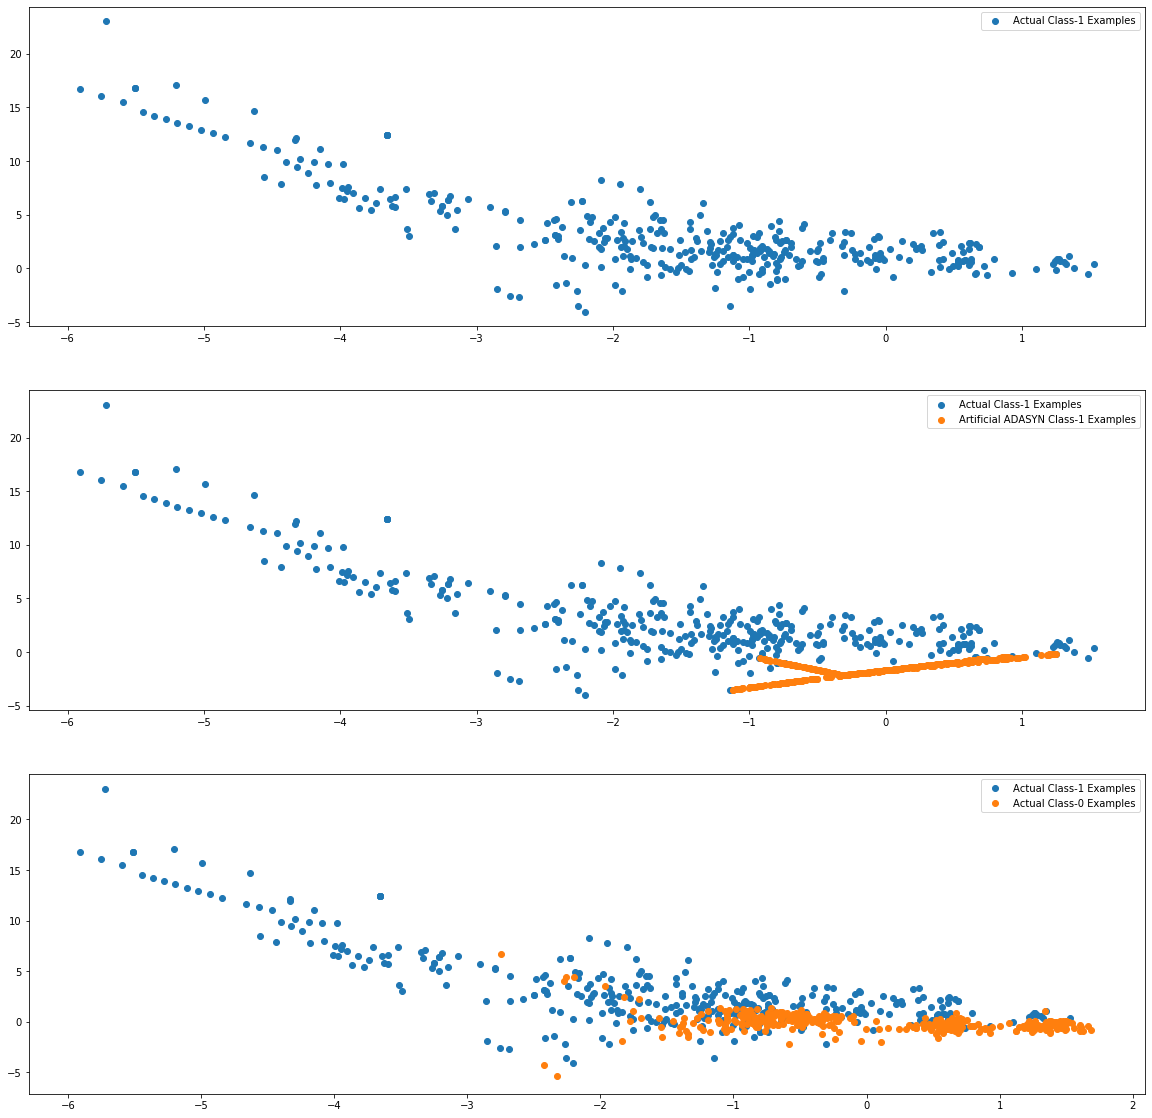

In [106]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [107]:
print(np.bincount(y_train_adasyn))

[213235 213221]


In [109]:
X_train_adasyn = pd.DataFrame(X_train_adasyn, columns=X_train_columns)
X_train_adasyn.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-0.909443,1.018396,1.342998,0.032714,-0.274220,-0.772294,0.559472,-0.092753,-0.404456,-0.084273,...,0.078031,-0.251887,-0.795493,-0.138079,1.258321,0.204214,0.219317,-1.092588,-0.481267,-0.541675
1,-1.691436,0.405942,-0.712540,-0.036731,-2.529866,0.054850,-0.328242,2.192528,0.428920,-1.403381,...,-1.095115,-0.092402,-0.257817,0.537037,0.818771,-1.414121,1.287567,-0.446808,-1.460378,1.601283
2,-1.839919,-1.879686,-0.089647,-1.375905,0.257270,1.450839,0.838481,0.248154,-0.594623,-0.139668,...,-2.470298,-1.173167,-0.186515,3.260273,-1.466223,1.733374,-0.714125,0.841220,-1.885470,1.789740
3,0.628096,0.026415,0.311417,0.524219,-0.371123,-0.517105,-0.052650,-0.130199,0.154954,-0.044729,...,-0.226335,-0.286502,-0.857807,0.336913,0.586606,0.118816,0.313397,-0.064144,0.067474,-1.147284
4,0.617433,-0.066274,0.563408,0.483309,-0.464895,-0.099950,-0.344283,-0.014638,0.369421,-0.082900,...,-0.139793,-0.060883,-0.178979,0.184847,0.069266,0.144187,0.579851,0.005778,0.085724,-0.912452


### Logistic Regression with ADASYN

In [177]:

n_folds = 5

params =  {'C':[0.001,0.01,0.1,1,10,100],'penalty':['l1','l2']}

log = LogisticRegression(random_state = 0)

log_reg = GridSearchCV(log, params, 
                    cv=n_folds, 
                   scoring="roc_auc")
log_reg.fit(X_train_adasyn,y_train_adasyn)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [181]:
# scores of GridSearch CV
scores_log_reg_adasyn = log_reg.cv_results_
pd.DataFrame(scores_log_reg_adasyn)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.956410,0.515771,0.056260,0.003875,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",0.957170,0.960346,0.928667,0.963551,0.960447,0.954036,0.012844,11
1,5.329740,0.131907,0.051356,0.002366,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.960483,0.960627,0.925383,0.963065,0.959759,0.953863,0.014284,12
2,7.782745,0.782310,0.062099,0.010069,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",0.960405,0.965388,0.923654,0.964820,0.959261,0.954705,0.015709,1
3,6.911079,0.238771,0.054687,0.009865,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.960419,0.965333,0.923261,0.964623,0.959396,0.954606,0.015841,2
4,8.672546,0.667068,0.062117,0.004686,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.960262,0.966076,0.922298,0.964797,0.959142,0.954515,0.016320,3
5,7.596988,0.514982,0.054427,0.002964,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.960252,0.966105,0.922249,0.964786,0.959149,0.954508,0.016342,4
6,8.643102,0.773039,0.057695,0.005799,1,l1,"{'C': 1, 'penalty': 'l1'}",0.960238,0.966148,0.922144,0.964784,0.959123,0.954487,0.016387,6
7,7.878675,0.339242,0.054255,0.002587,1,l2,"{'C': 1, 'penalty': 'l2'}",0.960228,0.966193,0.922113,0.964795,0.959109,0.954488,0.016405,5
8,8.675240,0.699009,0.056421,0.002245,10,l1,"{'C': 10, 'penalty': 'l1'}",0.960236,0.966155,0.922129,0.964789,0.959121,0.954486,0.016394,7
9,7.836312,0.318184,0.059688,0.006901,10,l2,"{'C': 10, 'penalty': 'l2'}",0.960226,0.966201,0.922099,0.964796,0.959106,0.954486,0.016412,8


In [179]:
# printing the optimal accuracy score and hyperparameters
print('We can get roc_auc of',log_reg.best_score_,'using',log_reg.best_params_)

We can get roc_auc of 0.9547053842967266 using {'C': 0.01, 'penalty': 'l1'}


In [110]:
log_reg_adasyn = LogisticRegression(random_state=0,C=0.01,penalty='l1')

In [111]:
log_reg_adasyn.fit(X_train_adasyn,y_train_adasyn)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
y_pred_log_adasyn = log_reg_adasyn.predict(X_test)

In [115]:
print(roc_auc_score(y_test,y_pred_log_adasyn))

0.9294194027509985


In [117]:
print(classification_report(y_test,y_pred_log_adasyn))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     71080
           1       0.02      0.95      0.03       122

    accuracy                           0.91     71202
   macro avg       0.51      0.93      0.49     71202
weighted avg       1.00      0.91      0.95     71202



### KNN using adasyn

In [126]:
knn_adasyn = KNeighborsClassifier(n_neighbors=5)
knn_adasyn.fit(X_train_adasyn,y_train_adasyn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [127]:
y_knn_adasyn = knn_adasyn.predict(X_test)

In [128]:
print(classification_report(y_test,y_knn_adasyn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71080
           1       0.45      0.82      0.58       122

    accuracy                           1.00     71202
   macro avg       0.72      0.91      0.79     71202
weighted avg       1.00      1.00      1.00     71202



In [129]:
print(roc_auc_score(y_test,y_knn_adasyn))

0.908970843289021


### Decision Trees with Adasyn

In [180]:
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(2, 20,5),'max_depth':range(2,10,3),'min_samples_leaf':(5,40,10)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree_adasyn = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc")
tree_adasyn.fit(X_train_adasyn, y_train_adasyn)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(2, 10, 3),
                         'min_samples_leaf': (5, 40, 10),
                        

In [182]:
# scores of GridSearch CV
scores_dt_adasyn = tree_adasyn.cv_results_
pd.DataFrame(scores_dt_adasyn)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.616846,0.017441,0.023908,0.000910,2,5,2,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.882538,0.829288,0.829494,0.877329,0.862042,0.856138,0.022855,25
1,2.607824,0.048357,0.024088,0.001118,2,5,7,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.882538,0.829288,0.829494,0.877329,0.862042,0.856138,0.022855,25
2,2.558105,0.010843,0.022915,0.000372,2,5,12,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.882538,0.829288,0.829494,0.877329,0.862042,0.856138,0.022855,25
3,2.570123,0.010494,0.023014,0.000401,2,5,17,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.882538,0.829288,0.829494,0.877329,0.862042,0.856138,0.022855,25
4,2.569714,0.003010,0.022916,0.000374,2,40,2,"{'max_depth': 2, 'min_samples_leaf': 40, 'min_...",0.882538,0.829288,0.829494,0.877329,0.862042,0.856138,0.022855,25
5,2.561287,0.008541,0.022716,0.000198,2,40,7,"{'max_depth': 2, 'min_samples_leaf': 40, 'min_...",0.882538,0.829288,0.829494,0.877329,0.862042,0.856138,0.022855,25
6,2.559809,0.006686,0.023113,0.000504,2,40,12,"{'max_depth': 2, 'min_samples_leaf': 40, 'min_...",0.882538,0.829288,0.829494,0.877329,0.862042,0.856138,0.022855,25
7,2.578341,0.015737,0.022915,0.000488,2,40,17,"{'max_depth': 2, 'min_samples_leaf': 40, 'min_...",0.882538,0.829288,0.829494,0.877329,0.862042,0.856138,0.022855,25
8,2.564072,0.008698,0.022817,0.000316,2,10,2,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_...",0.882538,0.829288,0.829494,0.877329,0.862042,0.856138,0.022855,25
9,2.564562,0.002355,0.023113,0.000507,2,10,7,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_...",0.882538,0.829288,0.829494,0.877329,0.862042,0.856138,0.022855,25


In [183]:
# printing the optimal accuracy score and hyperparameters
print('We can get roc_auc of',tree_adasyn.best_score_,'using',tree_adasyn.best_params_)

We can get roc_auc of 0.9387238711739009 using {'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [118]:
dtree_adasyn = DecisionTreeClassifier(max_depth=8,min_samples_leaf=10,min_samples_split=2)
dtree_adasyn.fit(X_train_adasyn,y_train_adasyn)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [119]:
y_pred_adasyn_dt = dtree_adasyn.predict(X_test)

In [120]:
print(classification_report(y_test,y_pred_adasyn_dt))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     71080
           1       0.02      0.84      0.04       122

    accuracy                           0.93     71202
   macro avg       0.51      0.88      0.50     71202
weighted avg       1.00      0.93      0.96     71202



In [121]:
print(roc_auc_score(y_test,y_pred_adasyn_dt))

0.8827486000535071


### Random Forest using Adasyn

In [184]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5),'max_features': [4, 8, 12],'min_samples_leaf': range(10, 70, 20)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf_adasyn = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc")
rf_adasyn.fit(X_train_adasyn, y_train_adasyn)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [185]:
# scores of GridSearch CV
scores_rf_adasyn = rf_adasyn.cv_results_
pd.DataFrame(scores_rf_adasyn)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.039778,0.077361,0.060642,0.003105,2,4,10,"{'max_depth': 2, 'max_features': 4, 'min_sampl...",0.921593,0.882222,0.855019,0.923495,0.924227,0.901311,0.028057,35
1,3.330641,0.249760,0.061415,0.002382,2,4,30,"{'max_depth': 2, 'max_features': 4, 'min_sampl...",0.906700,0.839576,0.900331,0.924336,0.942446,0.902678,0.034797,34
2,3.266350,0.117798,0.062517,0.004296,2,4,50,"{'max_depth': 2, 'max_features': 4, 'min_sampl...",0.937933,0.895331,0.880730,0.898531,0.914222,0.905349,0.019460,33
3,5.909303,0.241608,0.064198,0.003099,2,8,10,"{'max_depth': 2, 'max_features': 8, 'min_sampl...",0.925303,0.893978,0.891728,0.928538,0.933003,0.914510,0.017865,30
4,5.868966,0.058284,0.071046,0.006301,2,8,30,"{'max_depth': 2, 'max_features': 8, 'min_sampl...",0.898870,0.923752,0.920662,0.922407,0.909547,0.915048,0.009523,29
5,6.163906,0.164733,0.066999,0.004876,2,8,50,"{'max_depth': 2, 'max_features': 8, 'min_sampl...",0.939568,0.846645,0.893373,0.928640,0.931797,0.908005,0.034546,32
6,7.957555,0.327862,0.063812,0.004857,2,12,10,"{'max_depth': 2, 'max_features': 12, 'min_samp...",0.933623,0.868218,0.884942,0.947639,0.917557,0.910396,0.029680,31
7,8.424048,0.291112,0.065002,0.002454,2,12,30,"{'max_depth': 2, 'max_features': 12, 'min_samp...",0.932029,0.886017,0.829774,0.916170,0.931006,0.898999,0.038395,36
8,8.532099,0.423333,0.064318,0.001857,2,12,50,"{'max_depth': 2, 'max_features': 12, 'min_samp...",0.910245,0.905238,0.896896,0.930477,0.937462,0.916064,0.015389,28
9,9.426977,0.157687,0.085955,0.004075,7,4,10,"{'max_depth': 7, 'max_features': 4, 'min_sampl...",0.966886,0.981112,0.977851,0.985926,0.986384,0.979632,0.007114,25


In [186]:
# printing the optimal accuracy score and hyperparameters
print('We can get roc_auc of',rf_adasyn.best_score_,'using',rf_adasyn.best_params_)

We can get roc_auc of 0.9940208016205954 using {'max_depth': 17, 'max_features': 8, 'min_samples_leaf': 50}


In [122]:
rf_adasyn = RandomForestClassifier(max_depth=17,max_features=8,min_samples_leaf=50)
rf_adasyn.fit(X_train_adasyn,y_train_adasyn)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=17, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [123]:
y_predict_rf_adasyn = rf_adasyn.predict(X_test)

In [124]:
print(classification_report(y_test,y_predict_rf_adasyn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71080
           1       0.25      0.80      0.38       122

    accuracy                           1.00     71202
   macro avg       0.62      0.90      0.69     71202
weighted avg       1.00      1.00      1.00     71202



In [125]:
print(roc_auc_score(y_test,y_predict_rf_adasyn))

0.8995290460068083


#### XGBOOST using adasyn

In [220]:
folds = 5
param_grid = {'learning_rate':[0.2,0.4,0.6],
             'subsample':[0.3,0.5,0.6]
              }

xgb_model = XGBClassifier()

model_cv_xgb_adasyn = GridSearchCV(estimator=xgb_model,
                       param_grid = param_grid,
                       scoring='roc_auc',
                       cv = folds,
                       verbose=1,
                       return_train_score=True)

In [221]:
model_cv_xgb_adasyn.fit(X_train_adasyn,y_train_adasyn)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 241.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.4, 0.6],
                         'subsample': [0.3, 0.5, 0.6]},
             pre_dispatch='2*n_jobs', refit=True, re

In [222]:
# printing the optimal accuracy score and hyperparameters
print('We can get roc_auc of',model_cv_xgb_adasyn.best_score_,'using',model_cv_xgb_adasyn.best_params_)

We can get roc_auc of 0.9950718637959124 using {'learning_rate': 0.6, 'subsample': 0.6}


In [223]:
xgb_adasyn = XGBClassifier(learning_rate=0.6,subsample=0.6)

In [224]:
xgb_adasyn.fit(X_train_adasyn,y_train_adasyn)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.6, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

In [225]:
y_predict_xgb_adasyn = xgb_adasyn.predict_proba(X_test)

In [226]:
y_predict_xgb_adasyn_df = pd.DataFrame(y_predict_xgb_adasyn[:,1])
y_test_df = pd.DataFrame(y_test)

In [227]:
print(classification_report(y_test_df,y_predict_xgb_adasyn_df.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71080
           1       0.37      0.82      0.51       122

    accuracy                           1.00     71202
   macro avg       0.69      0.91      0.76     71202
weighted avg       1.00      1.00      1.00     71202



In [228]:
print(roc_auc_score(y_test,y_predict_xgb_adasyn_df.round()))

0.9086542985506979


In [243]:
print(xgb_adasyn.feature_importances_)

[0.03691767 0.02494862 0.04794826 0.12934105 0.02692874 0.0058461
 0.02263795 0.04055902 0.01991709 0.0112063  0.03106155 0.03759794
 0.03141635 0.23053844 0.017014   0.01624576 0.02283962 0.02522323
 0.01409441 0.02126892 0.04051923 0.01747958 0.02725018 0.02374848
 0.01684128 0.01682976 0.01678147 0.01050215 0.01649692]


In [347]:
y_pred_xgb_ada = xgb_adasyn.predict(X_test)

In [348]:
print(confusion_matrix(y_test,y_pred_xgb_ada))

[[70912   168]
 [   22   100]]


#### LightGBM classifier

In [278]:
fit_params = {"early_stopping_rounds" : 50, 
             "eval_metric" : 'binary', 
             "eval_set" : [(X_test,y_test)],
             'eval_names': ['valid'],
             'verbose': 0,
             'categorical_feature': 'auto'}

param_test = {'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4],
              'n_estimators' : [100, 300,  500, 800, 1000, 2000, 3000, 5000],
              'num_leaves': sp_randint(6, 50), 
              'min_child_samples': sp_randint(100, 500), 
              'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
              'subsample': sp_uniform(loc=0.2, scale=0.8), 
              'max_depth': [-1, 1, 2, 3, 4, 5, 6, 7],
              'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
              'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
              'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

#number of combinations
n_iter = 2 #(replace 2 by 200, 90 minutes)

#intialize lgbm and lunch the search
lgbm_clf = lgbm.LGBMClassifier(random_state=0, silent=True, metric='None', n_jobs=4)
grid_search = RandomizedSearchCV(
    estimator=lgbm_clf, param_distributions=param_test, 
    n_iter=n_iter,
    scoring='roc_auc',
    cv=5,
    refit=True,
    random_state=0,
    verbose=True)

grid_search.fit(X_train_adasyn, y_train_adasyn, **fit_params)
print('Best score reached: {} with params: {} '.format(grid_search.best_score_, grid_search.best_params_))

opt_parameters =  grid_search.best_params_

clf_sw = lgbm.LGBMClassifier(**lgbm_clf.get_params())
#Optimal parameter
clf_sw.set_params(**opt_parameters)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  5.7min finished


Best score reached: 0.9984735303681441 with params: {'colsample_bytree': 0.7292881023563949, 'learning_rate': 0.08, 'max_depth': -1, 'min_child_samples': 423, 'min_child_weight': 0.1, 'n_estimators': 5000, 'num_leaves': 15, 'reg_alpha': 2, 'reg_lambda': 20, 'subsample': 0.50750536583416} 


LGBMClassifier(boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.7292881023563949, importance_type='split',
               learning_rate=0.08, max_depth=-1, metric='None',
               min_child_samples=423, min_child_weight=0.1, min_split_gain=0.0,
               n_estimators=5000, n_jobs=4, num_leaves=15, objective=None,
               random_state=0, reg_alpha=2, reg_lambda=20, silent=True,
               subsample=0.50750536583416, subsample_for_bin=200000,
               subsample_freq=0)

In [280]:
lgbm_adasyn = lgbm.LGBMClassifier(boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.7292881023563949, importance_type='split',
               learning_rate=0.08, max_depth=-1, metric='None',
               min_child_samples=423, min_child_weight=0.1, min_split_gain=0.0,
               n_estimators=5000, n_jobs=4, num_leaves=15, objective=None,
               random_state=0, reg_alpha=2, reg_lambda=20, silent=True,
               subsample=0.50750536583416, subsample_for_bin=200000,
               subsample_freq=0)
lgbm_adasyn.fit(X_train_adasyn,y_train_adasyn)

LGBMClassifier(boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.7292881023563949, importance_type='split',
               learning_rate=0.08, max_depth=-1, metric='None',
               min_child_samples=423, min_child_weight=0.1, min_split_gain=0.0,
               n_estimators=5000, n_jobs=4, num_leaves=15, objective=None,
               random_state=0, reg_alpha=2, reg_lambda=20, silent=True,
               subsample=0.50750536583416, subsample_for_bin=200000,
               subsample_freq=0)

In [281]:
y_pred_lgbm_adasyn = lgbm_adasyn.predict(X_test)

In [282]:
print(classification_report(y_test,y_pred_lgbm_adasyn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71080
           1       0.66      0.81      0.73       122

    accuracy                           1.00     71202
   macro avg       0.83      0.91      0.87     71202
weighted avg       1.00      1.00      1.00     71202



In [283]:
print(roc_auc_score(y_test,y_pred_lgbm_adasyn))

0.9053859885421184


### Final Model

#### Selecting LGBM with SMOTE as the final model as it gives a good ROC AUC score and recall and also a decent precision as well

In [297]:
clf = lgbm.LGBMClassifier(boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.7292881023563949, importance_type='split',
               learning_rate=0.08, max_depth=-1, metric='None',
               min_child_samples=423, min_child_weight=0.1, min_split_gain=0.0,
               n_estimators=5000, n_jobs=4, num_leaves=15, objective=None,
               random_state=0, reg_alpha=2, reg_lambda=20, silent=True,
               subsample=0.50750536583416, subsample_for_bin=200000,
               subsample_freq=0)

In [298]:
clf.fit(X_train_smote,y_train_smote)

LGBMClassifier(boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.7292881023563949, importance_type='split',
               learning_rate=0.08, max_depth=-1, metric='None',
               min_child_samples=423, min_child_weight=0.1, min_split_gain=0.0,
               n_estimators=5000, n_jobs=4, num_leaves=15, objective=None,
               random_state=0, reg_alpha=2, reg_lambda=20, silent=True,
               subsample=0.50750536583416, subsample_for_bin=200000,
               subsample_freq=0)

In [299]:
y_pred_smote_lgbm = clf.predict(X_test)

In [304]:
y_pred_smote_lgbm_proba = clf.predict_proba(X_test)

In [327]:
y_pred_smote_lgbm_proba_df = pd.DataFrame(y_pred_smote_lgbm_proba[:,1])
y_test_df = pd.DataFrame(y_test)

In [343]:
print(confusion_matrix(y_test,y_pred_smote_lgbm))

[[71037    43]
 [   21   101]]


In [487]:
print('ROC_AUC score on test data:',roc_auc_score(y_test,y_pred_smote_lgbm))

ROC_AUC score on test data: 0.9136319501462217


In [352]:
print(classification_report(y_test,y_pred_smote_lgbm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71080
           1       0.70      0.83      0.76       122

    accuracy                           1.00     71202
   macro avg       0.85      0.91      0.88     71202
weighted avg       1.00      1.00      1.00     71202



In [488]:
print('Recall on Test Data : 0.83')

Recall on Test Data : 0.83


In [389]:
final_lgbm_out_df = pd.DataFrame()
final_lgbm_out_df = final_lgbm_out_df.append(X_test)
final_lgbm_out_df['Predicted'] = y_pred_smote_lgbm

In [390]:
final_lgbm_out_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,Predicted
0,0.659411,-0.234001,-0.561628,0.368991,1.318668,2.564133,-0.741733,1.066227,0.710699,-0.096649,...,-0.221829,-0.414147,-0.219297,1.951683,1.710643,-0.513850,0.132072,0.068917,-1.135579,0
1,1.407599,-0.141608,-1.749395,-0.025657,1.963667,2.181518,-0.544705,0.731650,1.696462,-0.971256,...,-0.241990,-0.142451,0.131029,0.968299,0.160209,1.253995,-0.148179,-0.120183,-0.859871,0
2,0.097631,-0.939156,0.531329,0.345774,-1.054682,0.386129,-0.420602,0.233264,0.958114,-0.378012,...,0.058711,-0.543948,-0.216267,0.411421,-0.299617,1.725155,-0.235522,0.174961,1.692636,0
3,1.522150,-0.159734,-1.050873,0.195454,0.263371,-0.350145,0.083924,-0.283924,0.654996,0.117415,...,-0.492675,-1.237213,0.353166,-1.632615,-0.396954,0.627857,-0.206053,-0.211961,-1.194640,0
4,0.114950,1.082287,-1.468663,3.069688,1.593831,-0.314840,0.874974,-0.319168,-1.928778,0.889599,...,-0.030008,0.359895,0.613121,0.497176,-0.667441,0.958325,0.416351,0.028235,0.045996,0


In [393]:
y_test_list = y_test.tolist()

In [394]:
final_lgbm_out_df['Actual'] = y_test_list

In [395]:
final_lgbm_out_df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,Predicted,Actual
0,0.659411,-0.234001,-0.561628,0.368991,1.318668,2.564133,-0.741733,1.066227,0.710699,-0.096649,...,-0.414147,-0.219297,1.951683,1.710643,-0.513850,0.132072,0.068917,-1.135579,0,0
1,1.407599,-0.141608,-1.749395,-0.025657,1.963667,2.181518,-0.544705,0.731650,1.696462,-0.971256,...,-0.142451,0.131029,0.968299,0.160209,1.253995,-0.148179,-0.120183,-0.859871,0,0
2,0.097631,-0.939156,0.531329,0.345774,-1.054682,0.386129,-0.420602,0.233264,0.958114,-0.378012,...,-0.543948,-0.216267,0.411421,-0.299617,1.725155,-0.235522,0.174961,1.692636,0,0
3,1.522150,-0.159734,-1.050873,0.195454,0.263371,-0.350145,0.083924,-0.283924,0.654996,0.117415,...,-1.237213,0.353166,-1.632615,-0.396954,0.627857,-0.206053,-0.211961,-1.194640,0,0
4,0.114950,1.082287,-1.468663,3.069688,1.593831,-0.314840,0.874974,-0.319168,-1.928778,0.889599,...,0.359895,0.613121,0.497176,-0.667441,0.958325,0.416351,0.028235,0.045996,0,0


In [435]:
Amount = X_test2['Amount']
Amount = Amount.tolist()

In [436]:
final_lgbm_out_df['Amount'] = Amount

In [437]:
final_lgbm_out_df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,Predicted,Actual,Amount
0,0.659411,-0.234001,-0.561628,0.368991,1.318668,2.564133,-0.741733,1.066227,0.710699,-0.096649,...,-0.219297,1.951683,1.710643,-0.513850,0.132072,0.068917,-1.135579,0,0,1.99
1,1.407599,-0.141608,-1.749395,-0.025657,1.963667,2.181518,-0.544705,0.731650,1.696462,-0.971256,...,0.131029,0.968299,0.160209,1.253995,-0.148179,-0.120183,-0.859871,0,0,6.99
2,0.097631,-0.939156,0.531329,0.345774,-1.054682,0.386129,-0.420602,0.233264,0.958114,-0.378012,...,-0.216267,0.411421,-0.299617,1.725155,-0.235522,0.174961,1.692636,0,0,306.16
3,1.522150,-0.159734,-1.050873,0.195454,0.263371,-0.350145,0.083924,-0.283924,0.654996,0.117415,...,0.353166,-1.632615,-0.396954,0.627857,-0.206053,-0.211961,-1.194640,0,0,0.99
4,0.114950,1.082287,-1.468663,3.069688,1.593831,-0.314840,0.874974,-0.319168,-1.928778,0.889599,...,0.613121,0.497176,-0.667441,0.958325,0.416351,0.028235,0.045996,0,0,30.27


### Calculating some variables below that would be helpful in cost benefit analysis

In [443]:
fraud_true_Df = final_lgbm_out_df[(final_lgbm_out_df['Predicted'] == 1) & (final_lgbm_out_df['Actual']==1)]

In [450]:
amount_total_fraud = fraud_true_Df['Amount'].sum()

In [451]:
amount_total_fraud

10494.47

In [448]:
fraud_true_Df_fn = final_lgbm_out_df[(final_lgbm_out_df['Predicted'] == 0) & (final_lgbm_out_df['Actual']==1)]

In [453]:
amount_total_fn = fraud_true_Df_fn['Amount'].sum()
amount_total_fn

2903.16

In [454]:
fraud_true_Df_fp = final_lgbm_out_df[(final_lgbm_out_df['Predicted'] == 1) & (final_lgbm_out_df['Actual']==0)]
fraud_true_Df_fp.shape

(43, 32)

### Important features of the best model to understand the dataset

Top var = 26
2nd Top var = 29
3rd Top var = 4


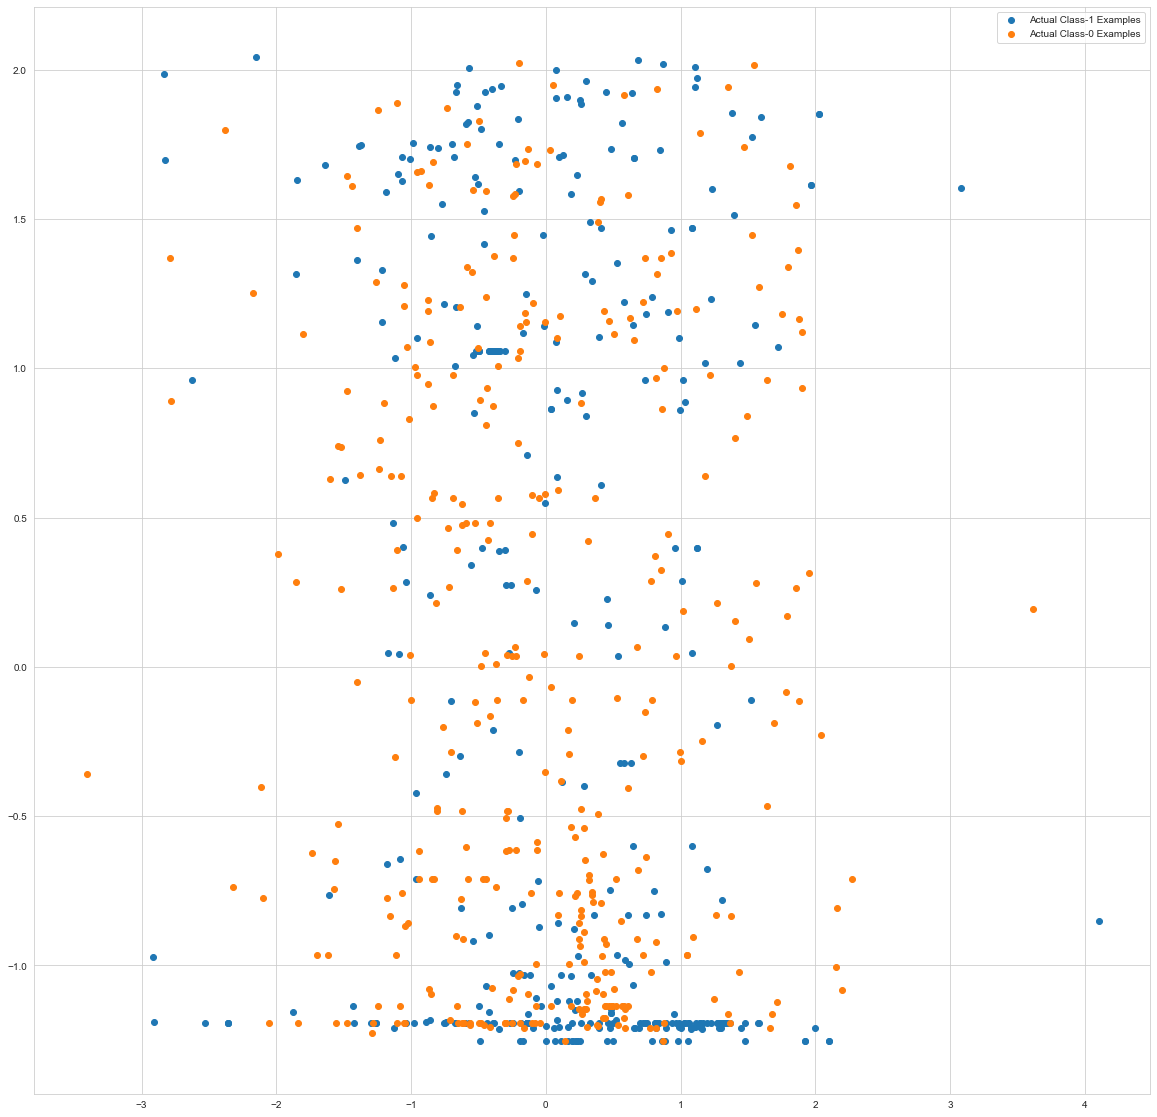

In [300]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [486]:
print('Train auc =', metrics.roc_auc_score(y_test,y_pred_smote_lgbm_proba[:,1]))
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_smote_lgbm_proba[:,1])
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 0.9677424190706385
0.0009424315165862455


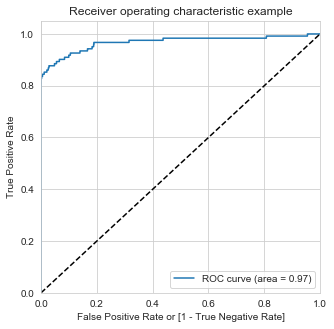

In [334]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    return None
draw_roc(y_test,y_pred_smote_lgbm_proba[:,1])

#### For the Cost-benefit analysis, the savings should be =

#### (Total amount of all the predicted transactions which are correctly flagged as fraudulent) - [ (Total amount of all the fraudulent transactions which were not flagged by the model ) + (TP+FP) * 10 ] 
##### ** As suggested by TA in discussion forum 

In [460]:
print(confusion_matrix(y_test,y_pred_lgbm_smote))

[[71037    43]
 [   21   101]]


In [461]:
print('True Positive = 101')
print('False Positive = 43')
print('False Negative = 21')

True Positive = 101
False Positive = 43
False Negative = 21


In [475]:
print('Total amount of all the predicted transactions which are correctly flagged as fraudulent = Rs.',amount_total_fraud)

Total amount of all the predicted transactions which are correctly flagged as fraudulent = Rs. 10494.47


In [474]:
print('Total amount of all the fraudulent transactions which were not flagged by the model= Rs.',amount_total_fn)

Total amount of all the fraudulent transactions which were not flagged by the model= Rs. 2903.16


In [473]:
tp = 101
fp = 43
total_cost_for_call = (tp+fp)*10
print('Total cost for call = Rs.',total_cost_for_call)

Total cost for call = Rs. 1440


In [472]:
total_amount_saved = amount_total_fraud - (amount_total_fn+total_cost_for_call)
print('Total amount saved by the bank = Rs.',round(total_amount_saved,2))

Total amount saved by the bank = Rs. 6151.31
